In [1]:
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import numpy as np



In [3]:
# You need to download the count data, and put it in the same directory as teh code is. 

data=pd.read_csv('GSE234118-Ready.csv')
data.set_index('Gene Symbol', inplace=True)

In [4]:
data

,Control (1),DPI-1 (1),DPI-3 (1),DPI-7 (1),DPI-10 (1),DPI-14 (1),DPI-21 (1),DPI-28 (1),Control (2),DPI-1 (2),...,DPI-1 (18),DPI-3 (18),DPI-7 (18),DPI-10 (18),DPI-14 (18),DPI-21 (22),DPI-28 (19),Control (22),DPI-21 (23),DPI-28 (20)
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
PGBD2,7,0,6,3,2,2,0,1,2,1,...,3,0,3,6,1,5,9,1,2,2
ZNF692,528,318,384,554,321,398,306,393,404,394,...,452,335,326,431,327,450,438,400,307,408
ZNF672,692,611,581,631,416,540,272,390,501,475,...,556,376,393,498,327,438,485,584,444,490
SH3BP5L,1684,1333,933,1803,1102,1334,828,1223,1154,719,...,1302,824,955,1280,1227,1244,994,1066,906,1079
LYPD8,20,38,3,157,358,67,25,81,11,27,...,24,7,25,35,15,4,9,20,22,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEKT4,0,0,0,3,0,3,0,0,1,3,...,1,0,0,0,0,0,0,0,1,0
CYP2E1,0,1,0,0,0,1,0,3,7,2,...,3,10,3,3,0,9,2,5,7,2
PVR,2,0,0,1,0,0,0,3,3,1,...,0,0,1,0,0,0,2,1,0,0


In [5]:
list(data.columns)

['Control (1)',
 'DPI-1 (1)',
 'DPI-3 (1)',
 'DPI-7 (1)',
 'DPI-10 (1)',
 'DPI-14 (1)',
 'DPI-21 (1)',
 'DPI-28 (1)',
 'Control (2)',
 'DPI-1 (2)',
 'DPI-3 (2)',
 'DPI-7 (2)',
 'DPI-10 (2)',
 'DPI-14 (2)',
 'DPI-21 (2)',
 'DPI-28 (2)',
 'Control (3)',
 'DPI-1 (3)',
 'DPI-3 (3)',
 'DPI-7 (3)',
 'DPI-10 (3)',
 'DPI-14 (3)',
 'DPI-21 (3)',
 'DPI-21 (4)',
 'Control (4)',
 'DPI-1 (4)',
 'DPI-3 (4)',
 'DPI-7 (4)',
 'DPI-10 (4)',
 'DPI-14 (4)',
 'DPI-21 (5)',
 'DPI-28 (3)',
 'Control (5)',
 'DPI-1 (5)',
 'DPI-3 (5)',
 'DPI-7 (5)',
 'DPI-10 (5)',
 'DPI-14 (5)',
 'DPI-21 (6)',
 'DPI-28 (4)',
 'Control (6)',
 'DPI-1 (6)',
 'DPI-3 (6)',
 'DPI-7 (6)',
 'DPI-10 (6)',
 'DPI-14 (6)',
 'DPI-21 (7)',
 'DPI-28 (5)',
 'Control (7)',
 'DPI-21 (8)',
 'DPI-28 (6)',
 'Control (8)',
 'DPI-21 (9)',
 'Control (9)',
 'DPI-1 (7)',
 'DPI-3 (7)',
 'DPI-7 (7)',
 'DPI-10 (7)',
 'DPI-14 (7)',
 'DPI-21 (10)',
 'DPI-28 (7)',
 'Control (10)',
 'DPI-1 (8)',
 'DPI-3 (8)',
 'DPI-7 (8)',
 'DPI-10 (8)',
 'DPI-14 (8)',
 'DPI-2

In [6]:

groups = ['Control', 'DPI-3', 'DPI-7', 'DPI-10', 'DPI-14']


group_dfs = {}

for group in groups:

    matching_cols = [col for col in data.columns if col.startswith(group)]
    group_dfs[group] = data[matching_cols]

control_df = group_dfs['Control']
dpi3_df = group_dfs['DPI-3']
dpi7_df = group_dfs['DPI-7']
dpi10_df = group_dfs['DPI-10']
dpi14_df = group_dfs['DPI-14']


In [7]:
Control_dpi3 = pd.concat([control_df, dpi3_df], axis=1)
Control_dpi7 = pd.concat([control_df, dpi7_df], axis=1)
Control_dpi10 = pd.concat([control_df, dpi10_df], axis=1)
Control_dpi14 = pd.concat([control_df, dpi14_df], axis=1)

In [8]:
combined_df = control_df.copy()


infected_df = pd.concat([dpi3_df, dpi7_df, dpi10_df, dpi14_df], axis=1)


infected_df.columns = [f'Infected ({i+1})' for i in range(infected_df.shape[1])]


Control_Infected = pd.concat([combined_df, infected_df], axis=1)


In [9]:
import subprocess

def run_r_script():
    command = ['Rscript', 'TMM_GLMQL.R']#or run "edgeR_Deseq2.R"
    
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

    if result.stdout:
        print('R script output:', result.stdout)
    if result.stderr:
        print('R script errors:', result.stderr)

if __name__ == "__main__":
    run_r_script()


R script output: [1] "Starting script execution."
[1] "Script has started running."
[1] "Guideline"
Script continues...
[1] "An error occurred: file choice cancelled"

R script errors: Loading required package: limma



In [10]:
import glob
import pandas as pd
import os

def read_csv_files_to_dict(directory):
    """
    Reads all CSV files matching the pattern 'DE_*_vs_*.csv' in the given directory,
    stores the data in DataFrames named after the CSV files (without extension),
    and creates a dictionary with file names as keys and DataFrames as values.

    Args:
        directory (str): Directory containing the CSV files.

    Returns:
        dict: A dictionary where keys are CSV file names (without extensions) and
              values are the corresponding pandas DataFrames.
    """

    pattern = os.path.join(directory, "EdgeR_Control*_vs_*.csv")


    csv_files = glob.glob(pattern)

    if not csv_files:
        print("No matching files found in the directory.")
        return {}


    dataframes_dict = {}

    for file in csv_files:
        try:

            file_name = os.path.splitext(os.path.basename(file))[0]

        
            df = pd.read_csv(file)

        
            globals()[file_name] = df 

            dataframes_dict[file_name] = df

            print(f"Loaded DataFrame: {file_name} from {file}")

        except Exception as e:
            print(f"Error reading file {file}: {e}")

    return dataframes_dict

if __name__ == "__main__":

    current_directory = "./"  

    dataframes = read_csv_files_to_dict(current_directory)


    print("\nAccessing DataFrames:")
    for file_name, df in dataframes.items():
        print(f"\nDataFrame: {file_name}")
        print(df.head()) 


Loaded DataFrame: EdgeR_Control_vs_DPI-10 from .\EdgeR_Control_vs_DPI-10.csv
Loaded DataFrame: EdgeR_Control_vs_DPI-14 from .\EdgeR_Control_vs_DPI-14.csv
Loaded DataFrame: EdgeR_Control_vs_DPI-3 from .\EdgeR_Control_vs_DPI-3.csv
Loaded DataFrame: EdgeR_Control_vs_DPI-7 from .\EdgeR_Control_vs_DPI-7.csv

Accessing DataFrames:

DataFrame: EdgeR_Control_vs_DPI-10
  GeneSymbol     logFC    logCPM           F        PValue           FDR  \
0       NEK2  2.915508  1.901357  159.609177  2.729757e-16  2.684203e-12   
1       GZMK  2.454910  5.686947  156.251073  3.263468e-16  2.684203e-12   
2      FOXM1  2.404771  2.285228  143.793070  1.526733e-15  6.506741e-12   
3      NCAPG  2.210598  2.971242  142.930377  1.582186e-15  6.506741e-12   
4     NUSAP1  1.857019  3.126135  139.159386  2.462690e-15  8.102250e-12   

   Bonferroni_pvalue  
0       4.490451e-12  
1       5.368405e-12  
2       2.511476e-11  
3       2.602697e-11  
4       4.051125e-11  

DataFrame: EdgeR_Control_vs_DPI-14
  Gene

In [11]:
dataframes.keys()

dict_keys(['EdgeR_Control_vs_DPI-10', 'EdgeR_Control_vs_DPI-14', 'EdgeR_Control_vs_DPI-3', 'EdgeR_Control_vs_DPI-7'])

In [16]:
import glob
import pandas as pd
import os

def read_csv_files_to_dict(directory):
    """
    Reads all CSV files matching the pattern 'DE_*_vs_*.csv' in the given directory,
    stores the data in DataFrames named after the CSV files (without extension),
    and creates a dictionary with file names as keys and DataFrames as values.

    Args:
        directory (str): Directory containing the CSV files.

    Returns:
        dict: A dictionary where keys are CSV file names (without extensions) and
              values are the corresponding pandas DataFrames.
    """
    pattern = os.path.join(directory, "EdgeR_Significant_*.csv")

    csv_files = glob.glob(pattern)

    if not csv_files:
        print("No matching files found in the directory.")
        return {}

    dataframes_dict = {}

    for file in csv_files:
        try:
            file_name = os.path.splitext(os.path.basename(file))[0]

            df = pd.read_csv(file)

            globals()[file_name] = df  

            dataframes_dict[file_name] = df

            print(f"Loaded DataFrame: {file_name} from {file}")

        except Exception as e:
            print(f"Error reading file {file}: {e}")

    return dataframes_dict

if __name__ == "__main__":
    current_directory = "./" 

    ranked_dataframes = read_csv_files_to_dict(current_directory)

    print("\nAccessing DataFrames:")
    for file_name, df in ranked_dataframes.items():
        print(f"\nDataFrame: {file_name}")
        print(df.head())  




Loaded DataFrame: EdgeR_Significant_DPI-10 from .\EdgeR_Significant_DPI-10.csv
Loaded DataFrame: EdgeR_Significant_DPI-14 from .\EdgeR_Significant_DPI-14.csv
Loaded DataFrame: EdgeR_Significant_DPI-3 from .\EdgeR_Significant_DPI-3.csv
Loaded DataFrame: EdgeR_Significant_DPI-7 from .\EdgeR_Significant_DPI-7.csv

Accessing DataFrames:

DataFrame: EdgeR_Significant_DPI-10
  Gene Symbol     logFC    logCPM           F        PValue           FDR  \
0        NEK2  2.915508  1.901357  159.609177  2.729757e-16  2.684203e-12   
1        GZMK  2.454910  5.686947  156.251073  3.263468e-16  2.684203e-12   
2       FOXM1  2.404771  2.285228  143.793070  1.526733e-15  6.506741e-12   
3       NCAPG  2.210598  2.971242  142.930377  1.582186e-15  6.506741e-12   
4      NUSAP1  1.857019  3.126135  139.159386  2.462690e-15  8.102250e-12   

   Bonferroni_pvalue  Bonferroni_adjusted_p-value  MAS_Score  MAS_rank  \
0       4.490451e-12                 2.729757e-16  15.563876         1   
1       5.368405e

In [17]:
ranked_dataframes.keys()

dict_keys(['EdgeR_Significant_DPI-10', 'EdgeR_Significant_DPI-14', 'EdgeR_Significant_DPI-3', 'EdgeR_Significant_DPI-7'])

In [18]:
import pandas as pd

csv_files = [
'EdgeR_Significant_DPI-3.csv', 'EdgeR_Significant_DPI-7.csv','EdgeR_Significant_DPI-10.csv', 'EdgeR_Significant_DPI-14.csv', 


]


ranked_dataframes = {filename: pd.read_csv(filename) for filename in csv_files}

print(ranked_dataframes.keys())


dict_keys(['EdgeR_Significant_DPI-3.csv', 'EdgeR_Significant_DPI-7.csv', 'EdgeR_Significant_DPI-10.csv', 'EdgeR_Significant_DPI-14.csv'])


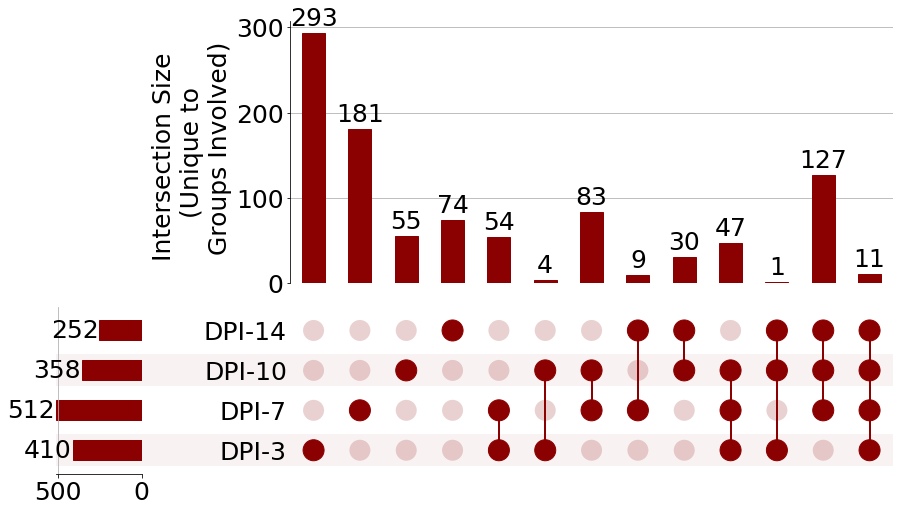

In [19]:
import os
import pandas as pd
from upsetplot import UpSet, from_contents
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import simpledialog



def filter_by_logfc(dataframes, threshold):
    filtered_data = {}
    for key, df in dataframes.items():
        upregulated = df[df['logFC'] > threshold]
        
        filtered_data[key] = upregulated
    return filtered_data

def ask_for_threshold():
    root = tk.Tk()
    root.withdraw()  
    root.attributes('-topmost', True)  
    threshold = simpledialog.askfloat("Input", "Cross-MAS Analysis: Please enter the threshold for LogFC for upregulation analysis (i.e., LogFC > m):", parent=root)
    root.destroy()
    return threshold

threshold = ask_for_threshold()

upregulated_results = filter_by_logfc(ranked_dataframes, threshold)

dfs = []
group_names = []

upset_data = {}
for key, df in upregulated_results.items():
    new_key = key.replace('EdgeR_Significant_', '').replace('.csv', '')
    upset_data[new_key] = set(df['Gene Symbol'])
    dfs.append(df)
    group_names.append(new_key)

combined = from_contents(upset_data)

fig = plt.figure(figsize=(10, 4))

plt.rcParams.update({
    'font.size': 25,
    'font.weight': 'normal',
    'font.style': 'normal'
})

upset = UpSet(combined,
              subset_size='count',
              element_size=60,
              show_counts=True,
              sort_categories_by=None, 
              facecolor='darkred')

upset_ax = upset.plot(fig=fig)

for ax in fig.axes:
    if ax.get_ylabel() == '':  
        for label in ax.get_yticklabels():
            label.set_fontsize(25)  
            label.set_fontweight('normal')

plt.setp(plt.gca().get_yticklabels(), fontsize=25, fontweight='normal')
plt.gca().set_ylabel('Intersection Size \n (Unique to \n Groups Involved)', fontsize=25, fontweight='normal')

plt.show()


In [20]:
top_k=10
top_genes_results = get_top_genes_by_mas_rank(dfs, group_names,top_k)

for combo, top_genes in top_genes_results.items():
    print(f"\nTop 10 genes for combination {combo}:")
    print(top_genes)
Upregulted_Ebola_vs_SarsCov2=get_top_genes_by_mas_rank(dfs, group_names,1000)


Top 10 genes for combination DPI-3:
['SCIMP', 'CMTR1', 'UNC93B1', 'ATF3', 'TMEM255A', 'HELZ2', 'PARP14', 'IFIT1', 'TRIM38', 'TRIM21']

Top 10 genes for combination DPI-7:
['CCL1', 'KY', 'OPTN', 'PCNA', 'TNFSF11', 'PHF19', 'CTLA4', 'TPM4', 'MTFR2', 'ANP32E']

Top 10 genes for combination DPI-10:
['HSP90B1', 'SSR3', 'DNAJB11', 'CHAC1', 'PDIA6', 'KHDC1L', 'UBA5', 'LMAN1', 'ARF3', 'GMPPB']

Top 10 genes for combination DPI-14:
['MMP23B', 'ZBTB32', 'MEGF11', 'BHLHE41', 'TBKBP1', 'PLPP3', 'KCNIP2', 'AICDA', 'TNFRSF6B', 'CD19']

Top 10 genes for combination DPI-3, DPI-7:
['GIMAP4', 'RTP4', 'PPA1', 'PI4K2B', 'LAP3', 'UBE2L6', 'PODXL', 'NHLRC3', 'IFIT2', 'KCNMA1']

Top 10 genes for combination DPI-3, DPI-10:
['GAS6', 'SLC22A4', 'CD163', 'TMEM150C']

Top 10 genes for combination DPI-7, DPI-10:
['TIGAR', 'SLCO4A1', 'CENPN', 'GINS3', 'HJURP', 'FBXO5', 'ADAMTS14', 'SMC2', 'CENPW', 'MCM7']

Top 10 genes for combination DPI-7, DPI-14:
['IGFBPL1', 'KNL1', 'SOX13', 'STYK1', 'TMEM213', 'WEE1', 'TP63', 

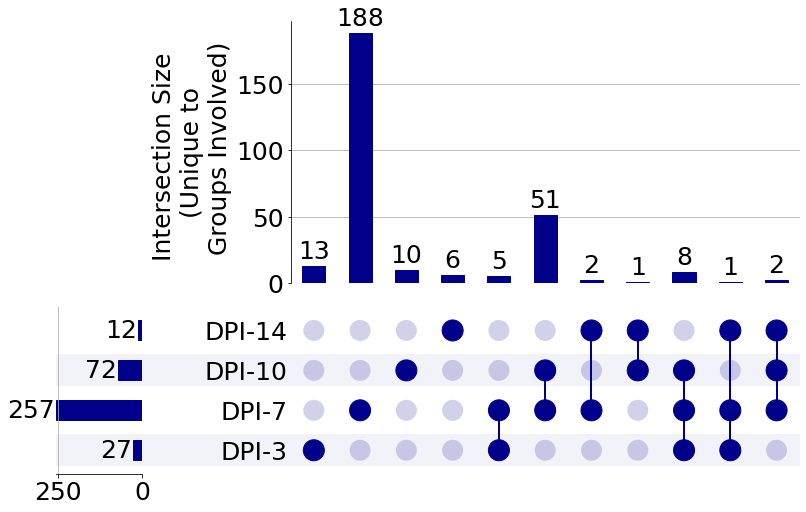

In [21]:
import os
import pandas as pd
from upsetplot import UpSet, from_contents
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import simpledialog



def filter_by_logfc(dataframes, threshold):
    filtered_data = {}
    for key, df in dataframes.items():
        upregulated = df[df['logFC'] < -threshold]
        
        filtered_data[key] = upregulated
    return filtered_data

def ask_for_threshold():
    root = tk.Tk()
    root.withdraw()  
    root.attributes('-topmost', True)  
    threshold = simpledialog.askfloat("Input", "Cross-MAS Analysis: Please enter the threshold for LogFC for upregulation analysis (i.e., LogFC > m):", parent=root)
    root.destroy()
    return threshold

threshold = ask_for_threshold()

upregulated_results = filter_by_logfc(ranked_dataframes, threshold)

dfs = []
group_names = []

upset_data = {}
for key, df in upregulated_results.items():
    new_key = key.replace('EdgeR_Significant_', '').replace('.csv', '')
    upset_data[new_key] = set(df['Gene Symbol'])
    dfs.append(df)
    group_names.append(new_key)

combined = from_contents(upset_data)

fig = plt.figure(figsize=(10, 4))

plt.rcParams.update({
    'font.size': 25,
    'font.weight': 'normal',
    'font.style': 'normal'
})

upset = UpSet(combined,
              subset_size='count',
              element_size=60,
              show_counts=True,
              sort_categories_by=None, 
              facecolor='darkblue')


upset_ax = upset.plot(fig=fig)


for ax in fig.axes:
    if ax.get_ylabel() == '':  
        for label in ax.get_yticklabels():
            label.set_fontsize(25) 
            label.set_fontweight('normal')

plt.setp(plt.gca().get_yticklabels(), fontsize=25, fontweight='normal')
plt.gca().set_ylabel('Intersection Size \n (Unique to \n Groups Involved)', fontsize=25, fontweight='normal')

plt.show()


In [22]:

top_genes_results = get_top_genes_by_mas_rank(dfs, group_names,top_k)

for combo, top_genes in top_genes_results.items():
    print(f"\nTop 10 genes for combination {combo}:")
    print(top_genes)
Downregulted_Ebola_vs_MPXV=get_top_genes_by_mas_rank(dfs, group_names,1000)


Top 10 genes for combination DPI-3:
['LRRC75B', 'YPEL1', 'CRTAM', 'SLC1A1', 'MMP1', 'TIGD3', 'PARP16', 'MANSC4', 'DNASE2B', 'HOPX']

Top 10 genes for combination DPI-7:
['MOK', 'SPNS3', 'NHSL2', 'CD1C', 'CYTH3', 'BLK', 'FAM160B2', 'PIK3R6', 'PTTG1IP', 'CD79A']

Top 10 genes for combination DPI-10:
['CNTNAP1', 'PARM1', 'PDSS1', 'CDH15', 'EDAR', 'PRRT2', 'RPH3AL', 'WNT10A', 'SLC22A17', 'PHLDA1']

Top 10 genes for combination DPI-14:
['FN1', 'JAKMIP2', 'PGM5', 'CAMKK1', 'RIN2', 'FAM20C']

Top 10 genes for combination DPI-3, DPI-7:
['ARNT', 'RFLNB', 'TSPEAR', 'PIGX', 'SMIM29']

Top 10 genes for combination DPI-7, DPI-10:
['DHRS3', 'FHL3', 'PLA2G7', 'BDKRB2', 'TENT5B', 'MYCL', 'GLIS3', 'CNR2', 'PLCB2', 'APBB2']

Top 10 genes for combination DPI-7, DPI-14:
['CLEC9A', 'NSG1']

Top 10 genes for combination DPI-10, DPI-14:
['TIFAB']

Top 10 genes for combination DPI-3, DPI-7, DPI-10:
['ASF1B', 'LIPN', 'COL15A1', 'DNA2', 'CD1A', 'KCTD7', 'HEY1', 'PRDM8']

Top 10 genes for combination DPI-3, DPI

In [23]:
import subprocess

def run_r_script():
    command = ['Rscript', 'DESeq2.R']#or run "edgeR_Deseq2.R"

    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

    if result.stdout:
        print('R script output:', result.stdout)
    if result.stderr:
        print('R script errors:', result.stderr)

if __name__ == "__main__":
    run_r_script()


R script output: [1] "Starting script execution."
[1] "An error occurred: file choice cancelled"

R script errors: Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Attaching package: 'S4Vectors'

The following object is masked from 'package:utils':

    findMatches

The following objects are masked from 'package:base':

    expand.grid, I, unname

Loading r

In [24]:
import glob
import pandas as pd
import os

def read_csv_files_to_dict(directory):
    """
    Reads all CSV files matching the pattern 'DE_*_vs_*.csv' in the given directory,
    stores the data in DataFrames named after the CSV files (without extension),
    and creates a dictionary with file names as keys and DataFrames as values.

    Args:
        directory (str): Directory containing the CSV files.

    Returns:
        dict: A dictionary where keys are CSV file names (without extensions) and
              values are the corresponding pandas DataFrames.
    """

    pattern = os.path.join(directory, "DESeq2_Control*_vs_*.csv")


    csv_files = glob.glob(pattern)

    if not csv_files:
        print("No matching files found in the directory.")
        return {}


    dataframes_dict = {}

    for file in csv_files:
        try:
 
            file_name = os.path.splitext(os.path.basename(file))[0]

 
            df = pd.read_csv(file)


            globals()[file_name] = df 

   
            dataframes_dict[file_name] = df

            print(f"Loaded DataFrame: {file_name} from {file}")

        except Exception as e:
            print(f"Error reading file {file}: {e}")

    return dataframes_dict

if __name__ == "__main__":

    current_directory = "./" 


    dataframes = read_csv_files_to_dict(current_directory)


    print("\nAccessing DataFrames:")
    for file_name, df in dataframes.items():
        print(f"\nDataFrame: {file_name}")
        print(df.head()) 


Loaded DataFrame: DESeq2_Control_vs_DPI-10_with_FDR_and_Bonferroni from .\DESeq2_Control_vs_DPI-10_with_FDR_and_Bonferroni.csv
Loaded DataFrame: DESeq2_Control_vs_DPI-14_with_FDR_and_Bonferroni from .\DESeq2_Control_vs_DPI-14_with_FDR_and_Bonferroni.csv
Loaded DataFrame: DESeq2_Control_vs_DPI-3_with_FDR_and_Bonferroni from .\DESeq2_Control_vs_DPI-3_with_FDR_and_Bonferroni.csv
Loaded DataFrame: DESeq2_Control_vs_DPI-7_with_FDR_and_Bonferroni from .\DESeq2_Control_vs_DPI-7_with_FDR_and_Bonferroni.csv

Accessing DataFrames:

DataFrame: DESeq2_Control_vs_DPI-10_with_FDR_and_Bonferroni
  GeneSymbol     baseMean     logFC     lfcSE       stat        PValue  \
0      PDIA4  1767.139554  2.602974  0.178861  14.553050  5.585628e-48   
1       MZB1  1704.205545  3.310882  0.240308  13.777688  3.472170e-43   
2    BLOC1S5  2326.850918  2.370135  0.180504  13.130679  2.196785e-39   
3       SDC1    54.833593  4.973062  0.397859  12.499546  7.507906e-36   
4    HSP90B1  3086.655121  1.976911  0.158

In [25]:
dataframes.keys()

dict_keys(['DESeq2_Control_vs_DPI-10_with_FDR_and_Bonferroni', 'DESeq2_Control_vs_DPI-14_with_FDR_and_Bonferroni', 'DESeq2_Control_vs_DPI-3_with_FDR_and_Bonferroni', 'DESeq2_Control_vs_DPI-7_with_FDR_and_Bonferroni'])

In [30]:
import glob
import pandas as pd
import os

def read_csv_files_to_dict(directory):
    """
    Reads all CSV files matching the pattern 'DE_*_vs_*.csv' in the given directory,
    stores the data in DataFrames named after the CSV files (without extension),
    and creates a dictionary with file names as keys and DataFrames as values.

    Args:
        directory (str): Directory containing the CSV files.

    Returns:
        dict: A dictionary where keys are CSV file names (without extensions) and
              values are the corresponding pandas DataFrames.
    """
    pattern = os.path.join(directory, "DESeq2_Significant_*.csv")

    csv_files = glob.glob(pattern)

    if not csv_files:
        print("No matching files found in the directory.")
        return {}

    dataframes_dict = {}

    for file in csv_files:
        try:
            file_name = os.path.splitext(os.path.basename(file))[0]

            df = pd.read_csv(file)

            globals()[file_name] = df 

            dataframes_dict[file_name] = df

            print(f"Loaded DataFrame: {file_name} from {file}")

        except Exception as e:
            print(f"Error reading file {file}: {e}")

    return dataframes_dict

if __name__ == "__main__":
    current_directory = "./" 

    ranked_dataframes = read_csv_files_to_dict(current_directory)

    print("\nAccessing DataFrames:")
    for file_name, df in ranked_dataframes.items():
        print(f"\nDataFrame: {file_name}")
        print(df.head()) 





Loaded DataFrame: DESeq2_Significant_DPI-10 from .\DESeq2_Significant_DPI-10.csv
Loaded DataFrame: DESeq2_Significant_DPI-14 from .\DESeq2_Significant_DPI-14.csv
Loaded DataFrame: DESeq2_Significant_DPI-3 from .\DESeq2_Significant_DPI-3.csv
Loaded DataFrame: DESeq2_Significant_DPI-7 from .\DESeq2_Significant_DPI-7.csv

Accessing DataFrames:

DataFrame: DESeq2_Significant_DPI-10
  Gene Symbol     baseMean     logFC     lfcSE       stat        PValue  \
0       PDIA4  1767.139554  2.602974  0.178861  14.553050  5.585628e-48   
1        MZB1  1704.205545  3.310882  0.240308  13.777688  3.472170e-43   
2     BLOC1S5  2326.850918  2.370135  0.180504  13.130679  2.196785e-39   
3        SDC1    54.833593  4.973062  0.397859  12.499546  7.507906e-36   
4     HSP90B1  3086.655121  1.976911  0.158604  12.464451  1.166728e-35   

            FDR  Bonferroni_pvalue  Bonferroni_adjusted_p-value  MAS_Score  \
0  7.708167e-44       9.123006e-44                 5.585628e-48  47.252928   
1  2.395797e

In [31]:
ranked_dataframes.keys()

dict_keys(['DESeq2_Significant_DPI-10', 'DESeq2_Significant_DPI-14', 'DESeq2_Significant_DPI-3', 'DESeq2_Significant_DPI-7'])

In [32]:
import pandas as pd

csv_files = [
'DESeq2_Significant_DPI-3.csv', 'DESeq2_Significant_DPI-7.csv','DESeq2_Significant_DPI-10.csv', 'DESeq2_Significant_DPI-14.csv', 


]


ranked_dataframes = {filename: pd.read_csv(filename) for filename in csv_files}

print(ranked_dataframes.keys())


dict_keys(['DESeq2_Significant_DPI-3.csv', 'DESeq2_Significant_DPI-7.csv', 'DESeq2_Significant_DPI-10.csv', 'DESeq2_Significant_DPI-14.csv'])


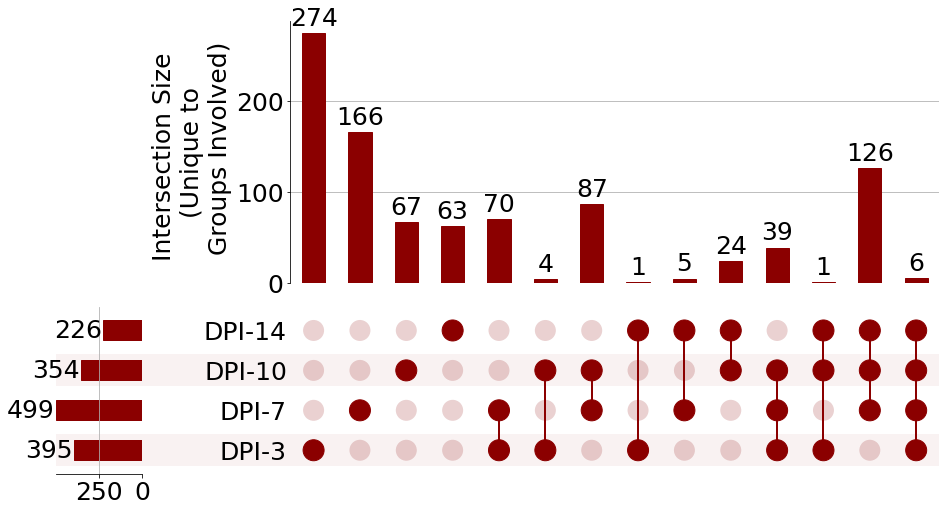

In [33]:
import os
import pandas as pd
from upsetplot import UpSet, from_contents
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import simpledialog



def filter_by_logfc(dataframes, threshold):
    filtered_data = {}
    for key, df in dataframes.items():
        upregulated = df[df['logFC'] > threshold]
        
        filtered_data[key] = upregulated
    return filtered_data

def ask_for_threshold():
    root = tk.Tk()
    root.withdraw()  
    root.attributes('-topmost', True)  
    threshold = simpledialog.askfloat("Input", "Cross-MAS Analysis: Please enter the threshold for LogFC for upregulation analysis (i.e., LogFC > m):", parent=root)
    root.destroy()
    return threshold

threshold = ask_for_threshold()

upregulated_results = filter_by_logfc(ranked_dataframes, threshold)

dfs = []
group_names = []

upset_data = {}
for key, df in upregulated_results.items():
    new_key = key.replace('DESeq2_Significant_', '').replace('.csv', '')
    upset_data[new_key] = set(df['Gene Symbol'])
    dfs.append(df)
    group_names.append(new_key)

combined = from_contents(upset_data)

fig = plt.figure(figsize=(10, 4))

plt.rcParams.update({
    'font.size': 25,
    'font.weight': 'normal',
    'font.style': 'normal'
})

upset = UpSet(combined,
              subset_size='count',
              element_size=60,
              show_counts=True,
              sort_categories_by=None, 
              facecolor='darkred')


upset_ax = upset.plot(fig=fig)


for ax in fig.axes:
    if ax.get_ylabel() == '':  
        for label in ax.get_yticklabels():
            label.set_fontsize(25)  
            label.set_fontweight('normal')

plt.setp(plt.gca().get_yticklabels(), fontsize=25, fontweight='normal')
plt.gca().set_ylabel('Intersection Size \n (Unique to \n Groups Involved)', fontsize=25, fontweight='normal')

plt.show()


In [34]:
top_k=10
top_genes_results = get_top_genes_by_mas_rank(dfs, group_names,top_k)

for combo, top_genes in top_genes_results.items():
    print(f"\nTop 10 genes for combination {combo}:")
    print(top_genes)
Upregulted_Ebola_vs_SarsCov2=get_top_genes_by_mas_rank(dfs, group_names,1000)


Top 10 genes for combination DPI-3:
['IL1RN', 'UNC93B1', 'LRRK1', 'CNP', 'ABHD6', 'ANGPTL6', 'TRIM38', 'P2RY6', 'SRGAP2', 'RIN2']

Top 10 genes for combination DPI-7:
['OPTN', 'TPM4', 'ANP32E', 'PCNA', 'MTFR2', 'SAE1', 'IDH2', 'SERPINB9', 'PHF19', 'SNRPA']

Top 10 genes for combination DPI-10:
['HSP90B1', 'DNAJB11', 'SSR3', 'PDIA6', 'UBA5', 'LMAN1', 'DERL3', 'ARF3', 'IL2RA', 'GMPPB']

Top 10 genes for combination DPI-14:
['ZBTB32', 'PLPP3', 'TNFRSF6B', 'KCNIP2', 'BHLHE41', 'MEGF11', 'BANK1', 'MS4A1', 'GEN1', 'SIGLEC10']

Top 10 genes for combination DPI-3, DPI-7:
['GIMAP4', 'SERPING1', 'PLA2G4C', 'CXCL10', 'PODXL', 'SLFN5', 'SIGLEC1', 'PPA1', 'RTP4', 'SDC3']

Top 10 genes for combination DPI-3, DPI-10:
['GAS6', 'SLC22A4', 'CD163', 'GLOD5']

Top 10 genes for combination DPI-3, DPI-14:
['STAP1']

Top 10 genes for combination DPI-7, DPI-10:
['TIGAR', 'CENPN', 'GINS3', 'CCNB1', 'CENPW', 'CENPO', 'MCM7', 'SMC2', 'AURKB', 'FBXO5']

Top 10 genes for combination DPI-7, DPI-14:
['WEE1', 'TMEM2

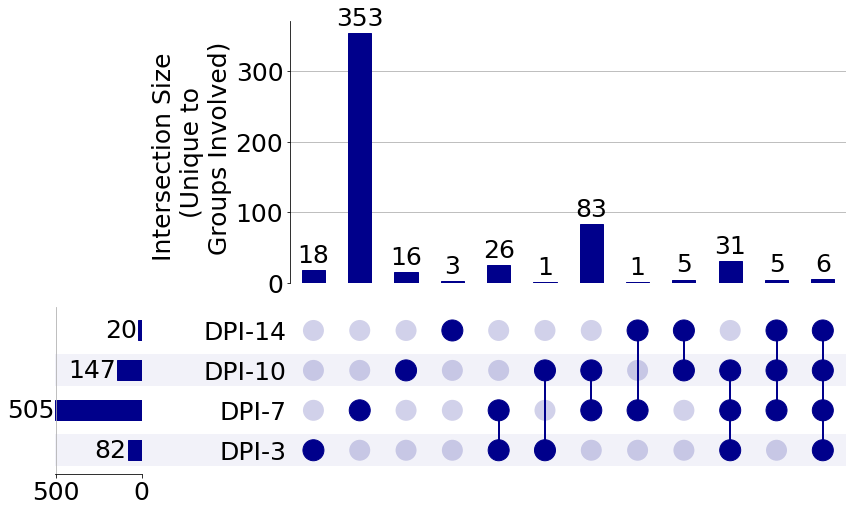

In [35]:
import os
import pandas as pd
from upsetplot import UpSet, from_contents
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import simpledialog



def filter_by_logfc(dataframes, threshold):
    filtered_data = {}
    for key, df in dataframes.items():
        upregulated = df[df['logFC'] < -threshold]
        
        filtered_data[key] = upregulated
    return filtered_data

def ask_for_threshold():
    root = tk.Tk()
    root.withdraw()  
    root.attributes('-topmost', True)  
    threshold = simpledialog.askfloat("Input", "Cross-MAS Analysis: Please enter the threshold for LogFC for upregulation analysis (i.e., LogFC > m):", parent=root)
    root.destroy()
    return threshold

threshold = ask_for_threshold()

upregulated_results = filter_by_logfc(ranked_dataframes, threshold)

dfs = []
group_names = []

upset_data = {}
for key, df in upregulated_results.items():
    new_key = key.replace('DESeq2_Significant_', '').replace('.csv', '')
    upset_data[new_key] = set(df['Gene Symbol'])
    dfs.append(df)
    group_names.append(new_key)

combined = from_contents(upset_data)

fig = plt.figure(figsize=(10, 4))

plt.rcParams.update({
    'font.size': 25,
    'font.weight': 'normal',
    'font.style': 'normal'
})

upset = UpSet(combined,
              subset_size='count',
              element_size=60,
              show_counts=True,
              sort_categories_by=None, 
              facecolor='darkblue')


upset_ax = upset.plot(fig=fig)


for ax in fig.axes:
    if ax.get_ylabel() == '':  
        for label in ax.get_yticklabels():
            label.set_fontsize(25)  
            label.set_fontweight('normal')

plt.setp(plt.gca().get_yticklabels(), fontsize=25, fontweight='normal')
plt.gca().set_ylabel('Intersection Size \n (Unique to \n Groups Involved)', fontsize=25, fontweight='normal')

plt.show()


In [36]:

top_genes_results = get_top_genes_by_mas_rank(dfs, group_names,top_k)

for combo, top_genes in top_genes_results.items():
    print(f"\nTop 10 genes for combination {combo}:")
    print(top_genes)
Downregulted_Ebola_vs_MPXV=get_top_genes_by_mas_rank(dfs, group_names,1000)


Top 10 genes for combination DPI-3:
['HOPX', 'LRRC75B', 'CRTAM', 'YPEL1', 'ORM1', 'ABCC5', 'STXBP6', 'SHB', 'ZBTB8A', 'SLC1A1']

Top 10 genes for combination DPI-7:
['CYTH3', 'BLK', 'PTTG1IP', 'TLE1', 'KCNH3', 'FCRLA', 'REPIN1', 'RIPOR1', 'CD40', 'RALGPS1']

Top 10 genes for combination DPI-10:
['PHLDA1', 'RCAN3', 'PDSS1', 'SLC22A17', 'LDOC1', 'CCDC146', 'BCL2', 'ZNF540', 'ZNF329', 'CDH15']

Top 10 genes for combination DPI-14:
['FN1', 'FAM20C', 'TMEM150B']

Top 10 genes for combination DPI-3, DPI-7:
['ARNT', 'MOK', 'SPNS3', 'DEPP1', 'CD1C', 'TMEM39B', 'PLA2G4B', 'ZNF770', 'CNTD2', 'HEPACAM2']

Top 10 genes for combination DPI-3, DPI-10:
['LRRC75A']

Top 10 genes for combination DPI-7, DPI-10:
['PLA2G7', 'DHRS3', 'ZSCAN18', 'FHL3', 'BDKRB2', 'CBX7', 'SULF2', 'ST6GALNAC2', 'TENT5B', 'BTG1']

Top 10 genes for combination DPI-7, DPI-14:
['CLEC9A']

Top 10 genes for combination DPI-10, DPI-14:
['PRRT2', 'JAKMIP2', 'MAPT', 'CAMKK1', 'TIFAB']

Top 10 genes for combination DPI-3, DPI-7, DPI-

In [37]:
def analyze_gene_data(Data):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    import numpy as np
    from matplotlib.ticker import MaxNLocator

    Data.rename(columns={'GeneSymbol': 'Gene Symbol'}, inplace=True)

    title = 'Ranked Genes'
    config = {
        'method': 'Bonferroni',
        'alpha': 0.05,
        'logFC_threshold': 1,
        'up_or_down_or_both': 'both_up_and_down_regulated',
        'highlight_genes': [],
        'top_genes': 20,
        'upreg_criteria': None,
        'downreg_criteria': None,
        'upregulated_color': '#FF0000',
        'downregulated_color': '#0000FF',
        'not_significant_color': '#808080',
        'not_significant_between_logFC_threshold_color': '#A0A0A0',
        'pie_chart_size': 0.2,
        'pie_chart_position': (0.85, 0.85),
        'ranking_method': 'MAS',
        'Magnitude (M)': 0,
        'Altitude (A)': 1,
        'g100': (-1, 0.2),
        'g010': (1, 0.24),
        'g001': (-0.4, -0.5),
        'g110': (-0.6, 0.24),
        'g101': (-0.8, -0.3),
        'g011': (0.7, -0.1),
        'g111': (0.4, -0.6)
    }

    AllGenes, Significant = volcano_plot_no_visualization(
        Data,
        M=config['Magnitude (M)'],
        A=config['Altitude (A)'],
        title=title,
        method=config['method'],
        alpha=config['alpha'],
        logFC_threshold=config['logFC_threshold'],
        highlight_genes=config['highlight_genes'],
        top_genes=config['top_genes'],
        upreg_criteria=config['upreg_criteria'],
        downreg_criteria=config['downreg_criteria'],
        upregulated_color=config['upregulated_color'],
        downregulated_color=config['downregulated_color'],
        not_significant_color=config['not_significant_color'],
        not_significant_between_logFC_threshold_color=config['not_significant_between_logFC_threshold_color'],
        pie_chart_size=config['pie_chart_size'],
        pie_chart_position=config['pie_chart_position'],
        ranking_method=config['ranking_method'],
        up_or_down_or_both=config['up_or_down_or_both'],
        g100=config['g100'], g010=config['g010'], g001=config['g001'],
        g110=config['g110'], g101=config['g101'], g011=config['g011'],
        g111=config['g111']
    )

    fig, ax = plt.subplots(1, 1, figsize=(5, 6))  

    upregulated_counts = Significant[Significant['Category'] == 'Upregulated'].shape[0]
    downregulated_counts = Significant[Significant['Category'] == 'Downregulated'].shape[0]

    positions = np.arange(1)
    width = 0.6

    ax.bar(positions - width/2, downregulated_counts, width, label='Downregulated', color='lightblue', edgecolor='black', alpha=0.7, linewidth=1.2)
    ax.bar(positions + width/2, upregulated_counts, width, label='Upregulated', color='pink', edgecolor='black', alpha=0.7, linewidth=1.2)

    ax.set_title("LogFC < -1 or LogFC > 1", fontsize=18, weight='bold')
    ax.set_xticks(positions)
    ax.set_xticklabels([], fontsize=0)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='y', labelsize=16)

    top_10_down_genes = {
        'BH': Significant[Significant['logFC'] < 0].head(10)['Gene Symbol'].tolist(),
    }

    top_10_up_genes = {
        'BH': Significant[Significant['logFC'] > 0].head(10)['Gene Symbol'].tolist(),
    }

    summary_stats = {
        'BH': {
            'Total': Significant.shape[0],
            'Upregulated': upregulated_counts,
            'Downregulated': downregulated_counts
        }
    }

    up_counts = [summary_stats[obj]['Upregulated'] for obj in summary_stats]
    down_counts = [summary_stats[obj]['Downregulated'] for obj in summary_stats]

    annotate_bars_vertical_with_totals(ax, positions, top_10_down_genes, top_10_up_genes, up_counts, down_counts, width)

    up_patch = mpatches.Patch(color='pink', label='Upregulated', edgecolor='black', alpha=0.7)
    down_patch = mpatches.Patch(color='lightblue', label='Downregulated', edgecolor='black', alpha=0.7)

    fig.legend(handles=[down_patch, up_patch], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.01), fontsize=16, frameon=False)

    plt.tight_layout(rect=[0, 0, 1, .95])
    plt.show()

    return AllGenes, Significant


Processing file: EdgeR_Significant_DPI-3.csv


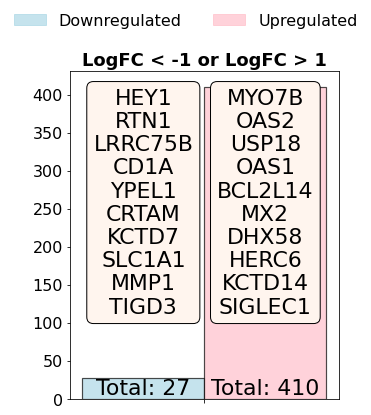

In [38]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

def load_and_process_data():
    file_names = ['EdgeR_Significant_DPI-3.csv']
    current_dir = os.getcwd()  

    for file_name in file_names:
        file_path = os.path.join(current_dir, file_name)

        if os.path.exists(file_path):
            print(f"Processing file: {file_name}")
            data = pd.read_csv(file_path)
            all_genes, significant_genes = analyze_gene_data(data)  

            new_base_name = file_name.replace('DE_', 'Ranked_DE_')

        else:
            print(f"File not found: {file_name}")


load_and_process_data()


Processing file: EdgeR_Significant_DPI-7.csv


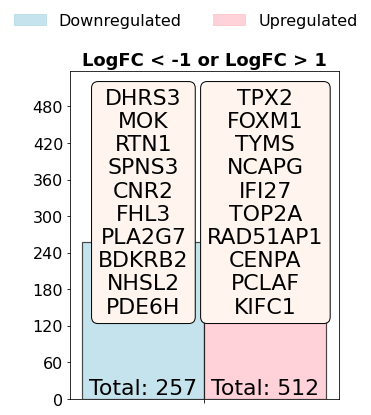

In [39]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

def load_and_process_data():
    file_names = ['EdgeR_Significant_DPI-7.csv']
    current_dir = os.getcwd() 

    for file_name in file_names:
        file_path = os.path.join(current_dir, file_name)

        if os.path.exists(file_path):
            print(f"Processing file: {file_name}")
            data = pd.read_csv(file_path)
            all_genes, significant_genes = analyze_gene_data(data)  

            new_base_name = file_name.replace('DE_', 'Ranked_DE_')

        else:
            print(f"File not found: {file_name}")


load_and_process_data()


Processing file: EdgeR_Significant_DPI-10.csv


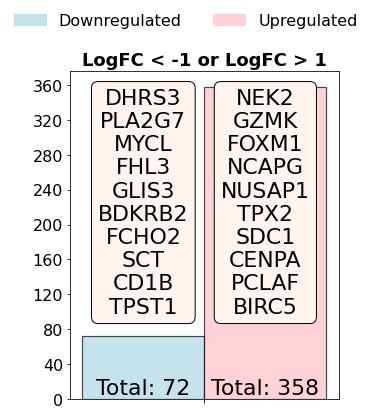

In [40]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

def load_and_process_data():
    file_names = ['EdgeR_Significant_DPI-10.csv']
    current_dir = os.getcwd()  
    for file_name in file_names:
        file_path = os.path.join(current_dir, file_name)

        if os.path.exists(file_path):
            print(f"Processing file: {file_name}")
            data = pd.read_csv(file_path)
            all_genes, significant_genes = analyze_gene_data(data)  

            new_base_name = file_name.replace('DE_', 'Ranked_DE_')

        else:
            print(f"File not found: {file_name}")


load_and_process_data()


Processing file: EdgeR_Significant_DPI-14.csv


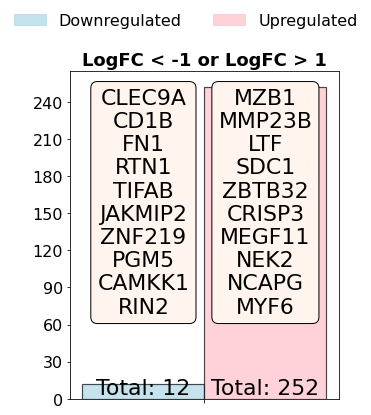

In [41]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

def load_and_process_data():
    file_names = ['EdgeR_Significant_DPI-14.csv']
    current_dir = os.getcwd()  

    for file_name in file_names:
        file_path = os.path.join(current_dir, file_name)

        if os.path.exists(file_path):
            print(f"Processing file: {file_name}")
            data = pd.read_csv(file_path)
            all_genes, significant_genes = analyze_gene_data(data)  

            new_base_name = file_name.replace('DE_', 'Ranked_DE_')

        else:
            print(f"File not found: {file_name}")


load_and_process_data()


Processing file: DESeq2_Significant_DPI-3.csv


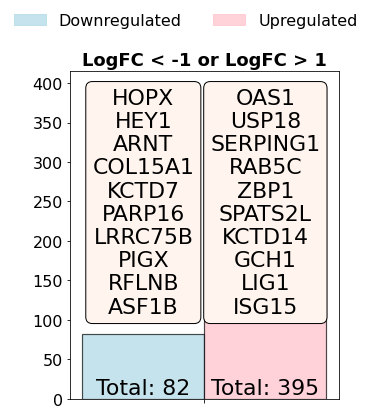

In [42]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

def load_and_process_data():
    file_names = ['DESeq2_Significant_DPI-3.csv']
    current_dir = os.getcwd()  

    for file_name in file_names:
        file_path = os.path.join(current_dir, file_name)

        if os.path.exists(file_path):
            print(f"Processing file: {file_name}")
            data = pd.read_csv(file_path)
            all_genes, significant_genes = analyze_gene_data(data) 

            new_base_name = file_name.replace('DE_', 'Ranked_DE_')

        else:
            print(f"File not found: {file_name}")


load_and_process_data()


Processing file: DESeq2_Significant_DPI-7.csv


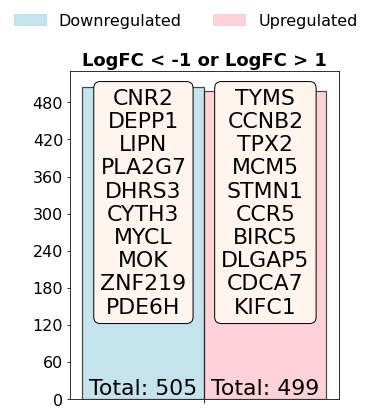

In [43]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

def load_and_process_data():
    file_names = ['DESeq2_Significant_DPI-7.csv']
    current_dir = os.getcwd() 

    for file_name in file_names:
        file_path = os.path.join(current_dir, file_name)

        if os.path.exists(file_path):
            print(f"Processing file: {file_name}")
            data = pd.read_csv(file_path)
            all_genes, significant_genes = analyze_gene_data(data)  

            new_base_name = file_name.replace('DE_', 'Ranked_DE_')

        else:
            print(f"File not found: {file_name}")


load_and_process_data()


Processing file: DESeq2_Significant_DPI-10.csv


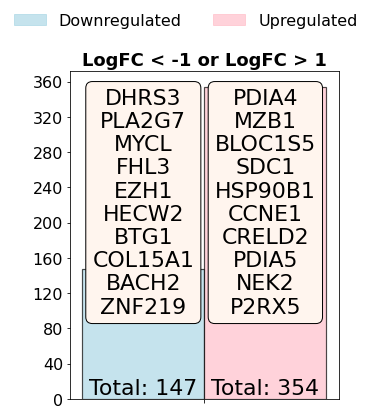

In [44]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

def load_and_process_data():
    file_names = ['DESeq2_Significant_DPI-10.csv']
    current_dir = os.getcwd()  

    for file_name in file_names:
        file_path = os.path.join(current_dir, file_name)

        if os.path.exists(file_path):
            print(f"Processing file: {file_name}")
            data = pd.read_csv(file_path)
            all_genes, significant_genes = analyze_gene_data(data)  

            new_base_name = file_name.replace('DE_', 'Ranked_DE_')

        else:
            print(f"File not found: {file_name}")


load_and_process_data()


Processing file: DESeq2_Significant_DPI-14.csv


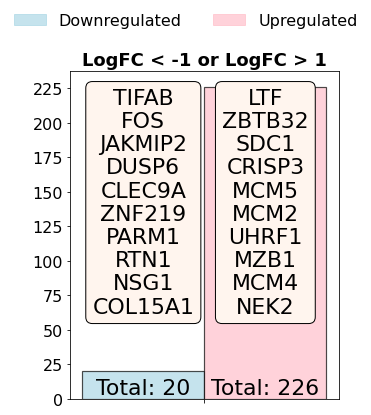

In [45]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

def load_and_process_data():
    file_names = ['DESeq2_Significant_DPI-14.csv']
    current_dir = os.getcwd()  

    for file_name in file_names:
        file_path = os.path.join(current_dir, file_name)

        if os.path.exists(file_path):
            print(f"Processing file: {file_name}")
            data = pd.read_csv(file_path)
            all_genes, significant_genes = analyze_gene_data(data)  

            new_base_name = file_name.replace('DE_', 'Ranked_DE_')

        else:
            print(f"File not found: {file_name}")


load_and_process_data()


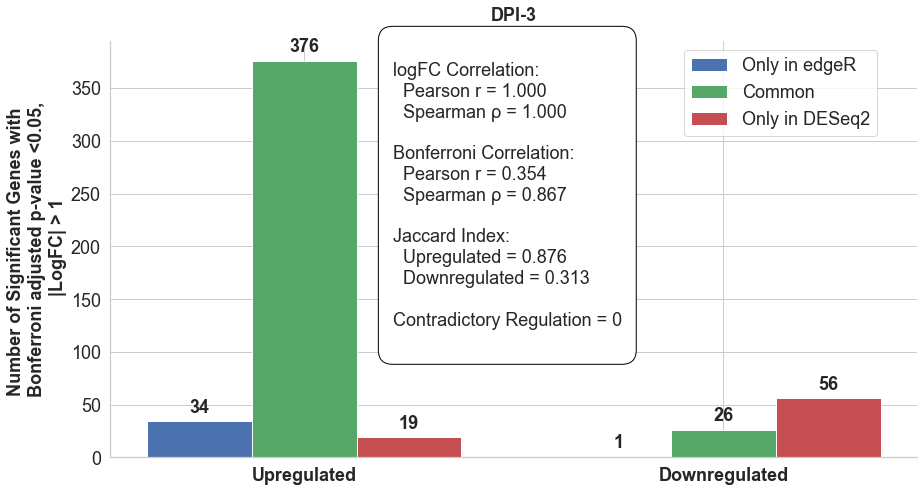

Significant Gene Counts:
  edgeR: 437
  DESeq2: 477
  Common: 402

Upregulated Genes:
  Common: 376
  Only in edgeR: 34
  Only in DESeq2: 19
  Jaccard Index: 0.876

Downregulated Genes:
  Common: 26
  Only in edgeR: 1
  Only in DESeq2: 56
  Jaccard Index: 0.313

Contradictory Regulation (Up in one, Down in other): 0

Correlation of logFC:
  Pearson r = 1.000
  Spearman ρ = 1.000

Correlation of Bonferroni-adjusted p-values:
  Pearson r = 0.354
  Spearman ρ = 0.867
Top 10 common_up: ['ABHD6', 'ACO1', 'ADA2', 'ADAM28', 'ADAMDEC1', 'ADAMTSL4', 'ADAR', 'ADM', 'ADRA1D', 'AGRN']
Top 10 common_down: ['ARNT', 'ASF1B', 'CD1A', 'COL15A1', 'CRTAM', 'DNA2', 'DNASE2B', 'HEY1', 'HOPX', 'KCTD7']
Top 10 edgeR_only_up: ['ARHGEF10L', 'ASS1', 'ATP6V1B2', 'BATF3', 'BMPR2', 'C1S', 'CCL7', 'CD5L', 'CH25H', 'CXCL11']
Top 10 deseq2_only_up: ['ABL2', 'CD33', 'ERAP2', 'FGL2', 'GFOD1', 'IL4R', 'MICB', 'MT1X', 'PHACTR2', 'PKIB']
Top 10 edgeR_only_down: ['RIBC2']
Top 10 deseq2_only_down: ['ABCC5', 'ADAM19', 'APBB2

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


edgeR_sig_df = pd.read_csv("EdgeR_Significant_DPI-3.csv").set_index("Gene Symbol")
deseq2_sig_df = pd.read_csv("DESeq2_Significant_DPI-3.csv").set_index("Gene Symbol")


edgeR_up = set(edgeR_sig_df[edgeR_sig_df["Category"] == "Upregulated"].index)
edgeR_down = set(edgeR_sig_df[edgeR_sig_df["Category"] == "Downregulated"].index)
deseq2_up = set(deseq2_sig_df[deseq2_sig_df["Category"] == "Upregulated"].index)
deseq2_down = set(deseq2_sig_df[deseq2_sig_df["Category"] == "Downregulated"].index)


common_genes = edgeR_sig_df.index.intersection(deseq2_sig_df.index)
df1 = edgeR_sig_df.loc[common_genes]
df2 = deseq2_sig_df.loc[common_genes]


valid_rows = df1["logFC"].notna() & df2["logFC"].notna() & \
             df1["Bonferroni_adjusted_p-value"].notna() & df2["Bonferroni_adjusted_p-value"].notna() & \
             np.isfinite(df1["logFC"]) & np.isfinite(df2["logFC"]) & \
             np.isfinite(df1["Bonferroni_adjusted_p-value"]) & np.isfinite(df2["Bonferroni_adjusted_p-value"])

df1_clean = df1[valid_rows]
df2_clean = df2[valid_rows]


logfc1 = df1_clean["logFC"]
logfc2 = df2_clean["logFC"]
bonf1 = df1_clean["Bonferroni_adjusted_p-value"]
bonf2 = df2_clean["Bonferroni_adjusted_p-value"]

pearson_logfc, _ = pearsonr(logfc1, logfc2)
spearman_logfc, _ = spearmanr(logfc1, logfc2)
pearson_bonf, _ = pearsonr(bonf1, bonf2)
spearman_bonf, _ = spearmanr(bonf1, bonf2)


jaccard_up = len(edgeR_up & deseq2_up) / len(edgeR_up | deseq2_up)
jaccard_down = len(edgeR_down & deseq2_down) / len(edgeR_down | deseq2_down)


contradictory = len((edgeR_up & deseq2_down) | (edgeR_down & deseq2_up))


common_up = edgeR_up & deseq2_up
common_down = edgeR_down & deseq2_down
edgeR_only_up = edgeR_up - deseq2_up
deseq2_only_up = deseq2_up - edgeR_up
edgeR_only_down = edgeR_down - deseq2_down
deseq2_only_down = deseq2_down - edgeR_down

labels = ["Upregulated", "Downregulated"]
x = np.arange(len(labels))
width = 0.25

edgeR_only_counts = [len(edgeR_only_up), len(edgeR_only_down)]
common_counts = [len(common_up), len(common_down)]
deseq2_only_counts = [len(deseq2_only_up), len(deseq2_only_down)]


sns.set(style="whitegrid")
plt.rcParams.update({"font.size": 12})  

colors = {
    "Only in edgeR": "#4C72B0",
    "Common": "#55A868",
    "Only in DESeq2": "#C44E52"
}

fig, ax = plt.subplots(figsize=(13, 7))
bar1 = ax.bar(x - width, edgeR_only_counts, width, label='Only in edgeR', color=colors["Only in edgeR"])
bar2 = ax.bar(x, common_counts, width, label='Common', color=colors["Common"])
bar3 = ax.bar(x + width, deseq2_only_counts, width, label='Only in DESeq2', color=colors["Only in DESeq2"])

ax.set_ylabel("Number of Significant Genes with \n Bonferroni adjusted p-value <0.05, \n |LogFC| > 1", fontsize=18, weight='bold')
ax.set_title("DPI-3", fontsize=18, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18, weight='bold')
ax.tick_params(axis='y', labelsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=True, fontsize=18, loc='upper left', bbox_to_anchor=(.7, 1))

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=18, weight='bold')

textstr = f"""
logFC Correlation:
  Pearson r = {pearson_logfc:.3f}
  Spearman ρ = {spearman_logfc:.3f}

Bonferroni Correlation:
  Pearson r = {pearson_bonf:.3f}
  Spearman ρ = {spearman_bonf:.3f}

Jaccard Index:
  Upregulated = {jaccard_up:.3f}
  Downregulated = {jaccard_down:.3f}

Contradictory Regulation = {contradictory}
"""
props = dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='black')
ax.text(.35, 1, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()






common_up = edgeR_up & deseq2_up
common_down = edgeR_down & deseq2_down
edgeR_only_up = edgeR_up - deseq2_up
deseq2_only_up = deseq2_up - edgeR_up
edgeR_only_down = edgeR_down - deseq2_down
deseq2_only_down = deseq2_down - edgeR_down


print("Significant Gene Counts:")
print(f"  edgeR: {edgeR_sig_df.shape[0]}")
print(f"  DESeq2: {deseq2_sig_df.shape[0]}")
print(f"  Common: {len(common_genes)}")

print("\nUpregulated Genes:")
print(f"  Common: {len(common_up)}")
print(f"  Only in edgeR: {len(edgeR_only_up)}")
print(f"  Only in DESeq2: {len(deseq2_only_up)}")
print(f"  Jaccard Index: {jaccard_up:.3f}")

print("\nDownregulated Genes:")
print(f"  Common: {len(common_down)}")
print(f"  Only in edgeR: {len(edgeR_only_down)}")
print(f"  Only in DESeq2: {len(deseq2_only_down)}")
print(f"  Jaccard Index: {jaccard_down:.3f}")

print(f"\nContradictory Regulation (Up in one, Down in other): {contradictory}")

print("\nCorrelation of logFC:")
print(f"  Pearson r = {pearson_logfc:.3f}")
print(f"  Spearman ρ = {spearman_logfc:.3f}")

print("\nCorrelation of Bonferroni-adjusted p-values:")
print(f"  Pearson r = {pearson_bonf:.3f}")
print(f"  Spearman ρ = {spearman_bonf:.3f}")

common_up = sorted(list(edgeR_up & deseq2_up))
common_down = sorted(list(edgeR_down & deseq2_down))
edgeR_only_up = sorted(list(edgeR_up - deseq2_up))
deseq2_only_up = sorted(list(deseq2_up - edgeR_up))
edgeR_only_down = sorted(list(edgeR_down - deseq2_down))
deseq2_only_down = sorted(list(deseq2_down - edgeR_down))

print("Top 10 common_up:", common_up[:10])
print("Top 10 common_down:", common_down[:10])
print("Top 10 edgeR_only_up:", edgeR_only_up[:10])
print("Top 10 deseq2_only_up:", deseq2_only_up[:10])
print("Top 10 edgeR_only_down:", edgeR_only_down[:10])
print("Top 10 deseq2_only_down:", deseq2_only_down[:10])









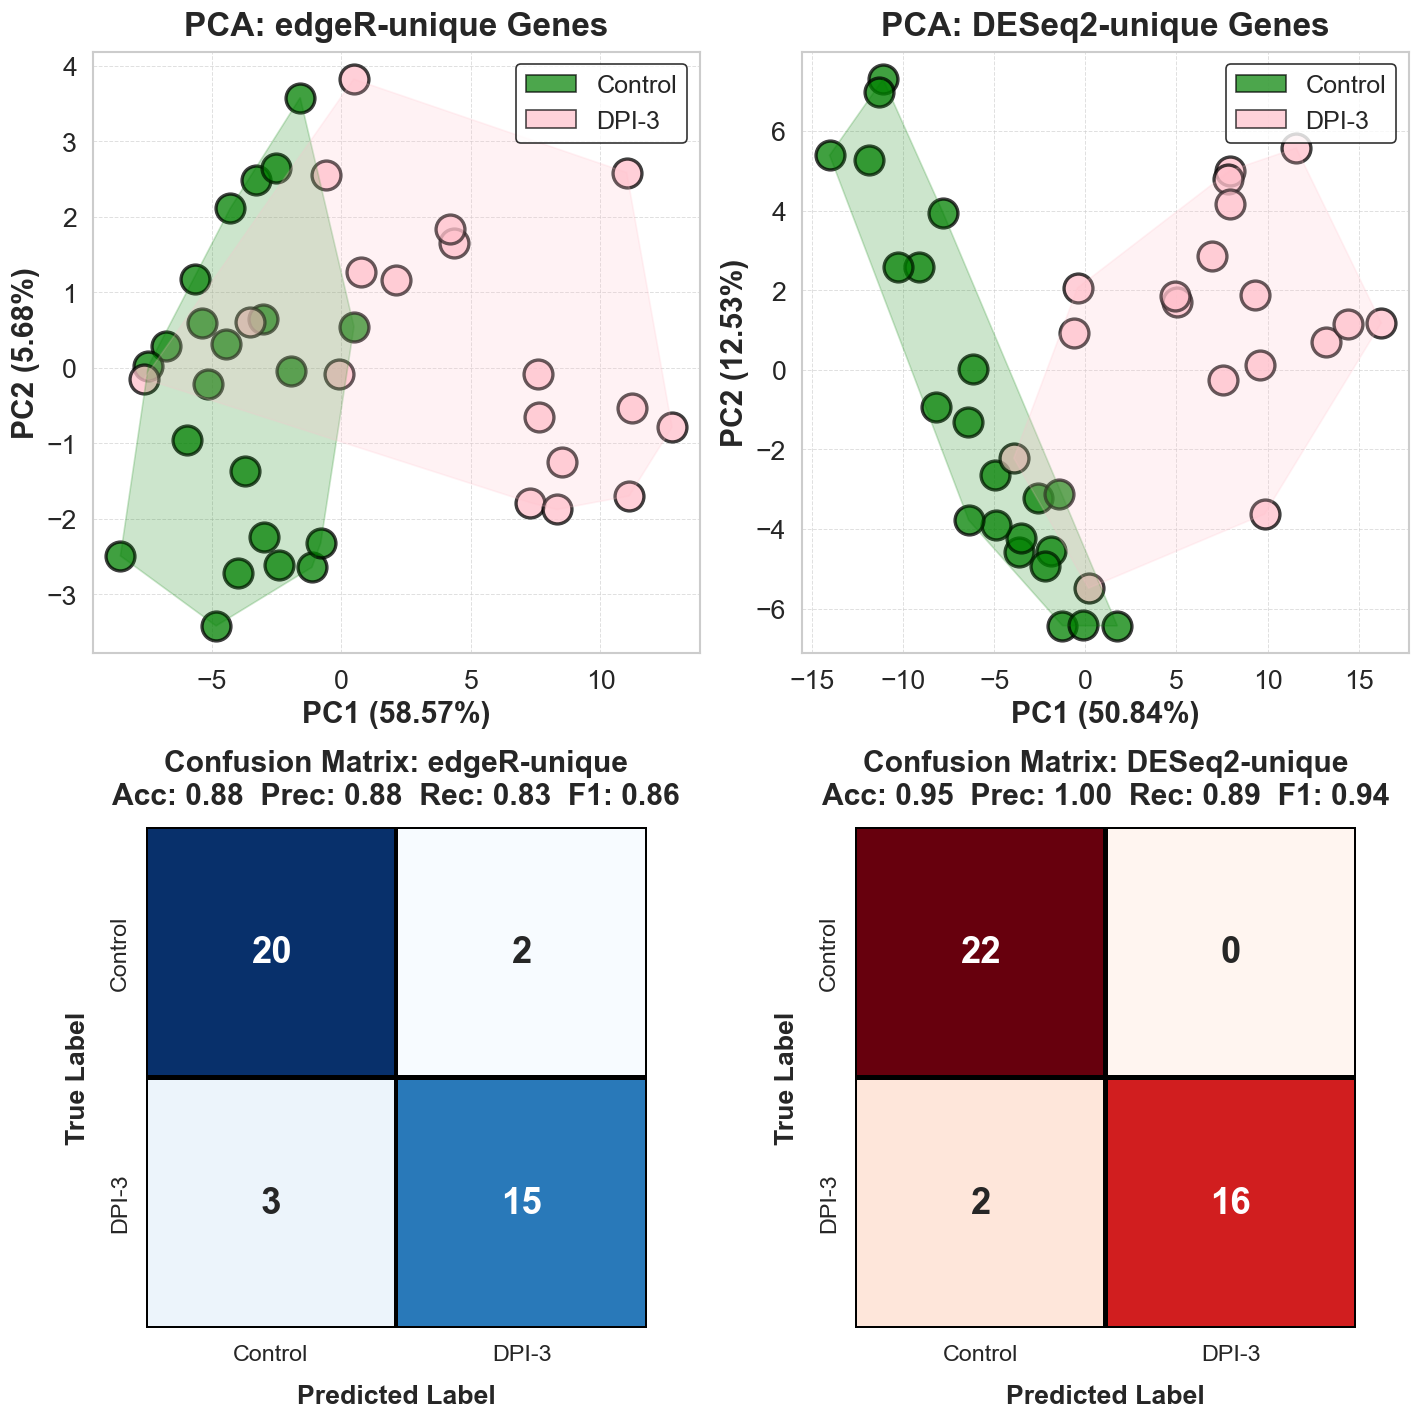

edgeR-unique Metrics
Accuracy:  0.875
Precision: 0.882
Recall:    0.833
F1 Score:  0.857
------------------------------
DESeq2-unique Metrics
Accuracy:  0.950
Precision: 1.000
Recall:    0.889
F1 Score:  0.941


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Patch
from scipy.spatial import ConvexHull
from matplotlib import gridspec
import seaborn as sns



def prepare_data(gene_list, df):
    data = df.copy()
    filtered_genes = [g for g in gene_list if g in data.index]
    data = data.loc[filtered_genes]
    data_transposed = np.log2(data.transpose() + 1)
    group_names = ['Control' if 'Control' in s else 'DPI-3' for s in data_transposed.index]
    labels = [0 if g == 'Control' else 1 for g in group_names]
    return data_transposed, labels, group_names

def plot_pca(ax, data_scaled, group_names, title, color_map):
    pca = PCA(n_components=2)
    components = pca.fit_transform(data_scaled)
    explained = pca.explained_variance_ratio_
    explained_text = [f"{v:.2%}" for v in explained]

    df = pd.DataFrame(components, columns=['PC1', 'PC2'])
    df['Group'] = group_names

    for label in df['Group'].unique():
        points = df[df['Group'] == label][['PC1', 'PC2']].values
        ax.scatter(points[:, 0], points[:, 1],
                   s=300, color=color_map[label], label=label,
                   edgecolor='black', alpha=0.75, linewidth=2)
        if len(points) > 2:
            hull = ConvexHull(points)
            hull_pts = points[hull.vertices]
            ax.fill(hull_pts[:, 0], hull_pts[:, 1], color=color_map[label], alpha=0.2)

    ax.set_title(title, fontsize=20, weight='bold', pad=10)
    ax.set_xlabel(f'PC1 ({explained_text[0]})', fontsize=18, weight='bold')
    ax.set_ylabel(f'PC2 ({explained_text[1]})', fontsize=18, weight='bold')
    ax.tick_params(axis='both', labelsize=16, width=2)
    ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

    handles = [Patch(facecolor=color_map[l], edgecolor='black', label=l, alpha=0.7) for l in df['Group'].unique()]
    ax.legend(handles=handles, fontsize=15, frameon=True, edgecolor='black', loc='upper right')

    return components

def run_classifier(components, labels):
    clf = LogisticRegression()
    clf.fit(components, labels)
    preds = clf.predict(components)
    return confusion_matrix(labels, preds)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_conf_matrix(ax, cm, title, cmap, class_labels, y_true, y_pred):
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=class_labels, yticklabels=class_labels,
                linewidths=2, linecolor="black", square=True, ax=ax,
                annot_kws={"size": 22, "weight": "bold"})
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    metrics_title = f"{title}\nAcc: {acc:.2f}  Prec: {prec:.2f}  Rec: {rec:.2f}  F1: {f1:.2f}"
    
    ax.set_title(metrics_title, fontsize=18, fontweight="bold", pad=14)
    ax.set_xlabel("Predicted Label", fontsize=16, fontweight="bold", labelpad=12)
    ax.set_ylabel("True Label", fontsize=16, fontweight="bold", labelpad=12)
    ax.tick_params(axis='both', labelsize=14, width=2)




color_map = {'Control': 'green', 'DPI-3': 'pink'}



data_scaled_er, labels_er, group_names_er = prepare_data(edgeR_only_up + edgeR_only_down, Control_dpi3)
data_scaled_dq, labels_dq, group_names_dq = prepare_data(deseq2_only_up + deseq2_only_down, Control_dpi3)


fig = plt.figure(figsize=(12, 12), dpi=120)
gs = gridspec.GridSpec(2, 2, height_ratios=[1.2, 1])


ax1 = fig.add_subplot(gs[0, 0])
components_er = plot_pca(ax1, data_scaled_er, group_names_er, "PCA: edgeR-unique Genes", color_map)

ax2 = fig.add_subplot(gs[0, 1])
components_dq = plot_pca(ax2, data_scaled_dq, group_names_dq, "PCA: DESeq2-unique Genes", color_map)


clf_er = LogisticRegression().fit(components_er, labels_er)
preds_er = clf_er.predict(components_er)
cm_er = confusion_matrix(labels_er, preds_er)

clf_dq = LogisticRegression().fit(components_dq, labels_dq)
preds_dq = clf_dq.predict(components_dq)
cm_dq = confusion_matrix(labels_dq, preds_dq)


ax3 = fig.add_subplot(gs[1, 0])
plot_conf_matrix(ax3, cm_er, "Confusion Matrix: edgeR-unique", cmap="Blues",
                 class_labels=["Control", "DPI-3"], y_true=labels_er, y_pred=preds_er)




ax4 = fig.add_subplot(gs[1, 1])
plot_conf_matrix(ax4, cm_dq, "Confusion Matrix: DESeq2-unique", cmap="Reds",
                 class_labels=["Control", "DPI-3"], y_true=labels_dq, y_pred=preds_dq)

plt.tight_layout()
plt.show()





acc_er = accuracy_score(labels_er, preds_er)
prec_er = precision_score(labels_er, preds_er)
rec_er = recall_score(labels_er, preds_er)
f1_er = f1_score(labels_er, preds_er)

print("edgeR-unique Metrics")
print(f"Accuracy:  {acc_er:.3f}")
print(f"Precision: {prec_er:.3f}")
print(f"Recall:    {rec_er:.3f}")
print(f"F1 Score:  {f1_er:.3f}")
print("-" * 30)


acc_dq = accuracy_score(labels_dq, preds_dq)
prec_dq = precision_score(labels_dq, preds_dq)
rec_dq = recall_score(labels_dq, preds_dq)
f1_dq = f1_score(labels_dq, preds_dq)

print("DESeq2-unique Metrics")
print(f"Accuracy:  {acc_dq:.3f}")
print(f"Precision: {prec_dq:.3f}")
print(f"Recall:    {rec_dq:.3f}")
print(f"F1 Score:  {f1_dq:.3f}")



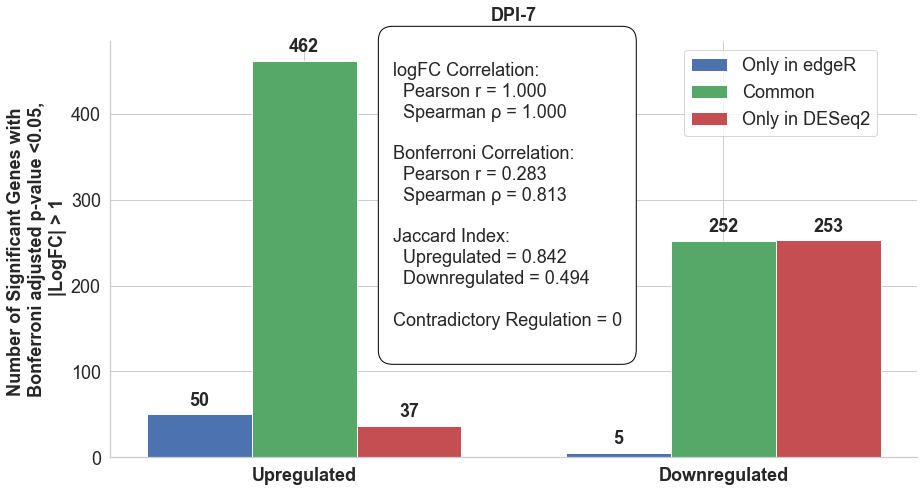

Significant Gene Counts:
  edgeR: 769
  DESeq2: 1004
  Common: 714

Upregulated Genes:
  Common: 462
  Only in edgeR: 50
  Only in DESeq2: 37
  Jaccard Index: 0.842

Downregulated Genes:
  Common: 252
  Only in edgeR: 5
  Only in DESeq2: 253
  Jaccard Index: 0.494

Contradictory Regulation (Up in one, Down in other): 0

Correlation of logFC:
  Pearson r = 1.000
  Spearman ρ = 1.000

Correlation of Bonferroni-adjusted p-values:
  Pearson r = 0.283
  Spearman ρ = 0.813
Top 10 common_up: ['ADAMTS14', 'AGPAT5', 'AGRN', 'AIFM1', 'AIFM2', 'ALPL', 'ALYREF', 'ANKRD39', 'ANLN', 'ANP32B']
Top 10 common_down: ['ABCB11', 'AFF3', 'APBB2', 'APPL2', 'ARAP3', 'ARHGAP42', 'ARID3B', 'ARNT', 'ARRB2', 'ASF1B']
Top 10 edgeR_only_up: ['ACTL6A', 'ALDH1B1', 'APOBEC3D', 'C1QTNF2', 'C1R', 'CDC20B', 'CDK2AP1', 'CNP', 'CRYBB1', 'DEFB1']
Top 10 deseq2_only_up: ['ANGPT2', 'ATF3', 'CCDC34', 'CD244', 'CD274', 'CHAC2', 'COX6C', 'CRISP3', 'ERH', 'ESR1']
Top 10 edgeR_only_down: ['C9orf129', 'MEGF11', 'OPN1LW', 'PTPRN2',

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


edgeR_sig_df = pd.read_csv("EdgeR_Significant_DPI-7.csv").set_index("Gene Symbol")
deseq2_sig_df = pd.read_csv("DESeq2_Significant_DPI-7.csv").set_index("Gene Symbol")


edgeR_up = set(edgeR_sig_df[edgeR_sig_df["Category"] == "Upregulated"].index)
edgeR_down = set(edgeR_sig_df[edgeR_sig_df["Category"] == "Downregulated"].index)
deseq2_up = set(deseq2_sig_df[deseq2_sig_df["Category"] == "Upregulated"].index)
deseq2_down = set(deseq2_sig_df[deseq2_sig_df["Category"] == "Downregulated"].index)

common_genes = edgeR_sig_df.index.intersection(deseq2_sig_df.index)
df1 = edgeR_sig_df.loc[common_genes]
df2 = deseq2_sig_df.loc[common_genes]


valid_rows = df1["logFC"].notna() & df2["logFC"].notna() & \
             df1["Bonferroni_adjusted_p-value"].notna() & df2["Bonferroni_adjusted_p-value"].notna() & \
             np.isfinite(df1["logFC"]) & np.isfinite(df2["logFC"]) & \
             np.isfinite(df1["Bonferroni_adjusted_p-value"]) & np.isfinite(df2["Bonferroni_adjusted_p-value"])

df1_clean = df1[valid_rows]
df2_clean = df2[valid_rows]


logfc1 = df1_clean["logFC"]
logfc2 = df2_clean["logFC"]
bonf1 = df1_clean["Bonferroni_adjusted_p-value"]
bonf2 = df2_clean["Bonferroni_adjusted_p-value"]

pearson_logfc, _ = pearsonr(logfc1, logfc2)
spearman_logfc, _ = spearmanr(logfc1, logfc2)
pearson_bonf, _ = pearsonr(bonf1, bonf2)
spearman_bonf, _ = spearmanr(bonf1, bonf2)


jaccard_up = len(edgeR_up & deseq2_up) / len(edgeR_up | deseq2_up)
jaccard_down = len(edgeR_down & deseq2_down) / len(edgeR_down | deseq2_down)


contradictory = len((edgeR_up & deseq2_down) | (edgeR_down & deseq2_up))


common_up = edgeR_up & deseq2_up
common_down = edgeR_down & deseq2_down
edgeR_only_up = edgeR_up - deseq2_up
deseq2_only_up = deseq2_up - edgeR_up
edgeR_only_down = edgeR_down - deseq2_down
deseq2_only_down = deseq2_down - edgeR_down

labels = ["Upregulated", "Downregulated"]
x = np.arange(len(labels))
width = 0.25

edgeR_only_counts = [len(edgeR_only_up), len(edgeR_only_down)]
common_counts = [len(common_up), len(common_down)]
deseq2_only_counts = [len(deseq2_only_up), len(deseq2_only_down)]


sns.set(style="whitegrid")
plt.rcParams.update({"font.size": 12})  
colors = {
    "Only in edgeR": "#4C72B0",
    "Common": "#55A868",
    "Only in DESeq2": "#C44E52"
}

fig, ax = plt.subplots(figsize=(13, 7))
bar1 = ax.bar(x - width, edgeR_only_counts, width, label='Only in edgeR', color=colors["Only in edgeR"])
bar2 = ax.bar(x, common_counts, width, label='Common', color=colors["Common"])
bar3 = ax.bar(x + width, deseq2_only_counts, width, label='Only in DESeq2', color=colors["Only in DESeq2"])

ax.set_ylabel("Number of Significant Genes with \n Bonferroni adjusted p-value <0.05, \n |LogFC| > 1", fontsize=18, weight='bold')
ax.set_title("DPI-7", fontsize=18, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18, weight='bold')
ax.tick_params(axis='y', labelsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=True, fontsize=18, loc='upper left', bbox_to_anchor=(.7, 1))

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=18, weight='bold')

textstr = f"""
logFC Correlation:
  Pearson r = {pearson_logfc:.3f}
  Spearman ρ = {spearman_logfc:.3f}

Bonferroni Correlation:
  Pearson r = {pearson_bonf:.3f}
  Spearman ρ = {spearman_bonf:.3f}

Jaccard Index:
  Upregulated = {jaccard_up:.3f}
  Downregulated = {jaccard_down:.3f}

Contradictory Regulation = {contradictory}
"""

props = dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='black')
ax.text(.35, 1, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()






common_up = edgeR_up & deseq2_up
common_down = edgeR_down & deseq2_down
edgeR_only_up = edgeR_up - deseq2_up
deseq2_only_up = deseq2_up - edgeR_up
edgeR_only_down = edgeR_down - deseq2_down
deseq2_only_down = deseq2_down - edgeR_down


print("Significant Gene Counts:")
print(f"  edgeR: {edgeR_sig_df.shape[0]}")
print(f"  DESeq2: {deseq2_sig_df.shape[0]}")
print(f"  Common: {len(common_genes)}")

print("\nUpregulated Genes:")
print(f"  Common: {len(common_up)}")
print(f"  Only in edgeR: {len(edgeR_only_up)}")
print(f"  Only in DESeq2: {len(deseq2_only_up)}")
print(f"  Jaccard Index: {jaccard_up:.3f}")

print("\nDownregulated Genes:")
print(f"  Common: {len(common_down)}")
print(f"  Only in edgeR: {len(edgeR_only_down)}")
print(f"  Only in DESeq2: {len(deseq2_only_down)}")
print(f"  Jaccard Index: {jaccard_down:.3f}")

print(f"\nContradictory Regulation (Up in one, Down in other): {contradictory}")

print("\nCorrelation of logFC:")
print(f"  Pearson r = {pearson_logfc:.3f}")
print(f"  Spearman ρ = {spearman_logfc:.3f}")

print("\nCorrelation of Bonferroni-adjusted p-values:")
print(f"  Pearson r = {pearson_bonf:.3f}")
print(f"  Spearman ρ = {spearman_bonf:.3f}")



common_up = sorted(list(edgeR_up & deseq2_up))
common_down = sorted(list(edgeR_down & deseq2_down))
edgeR_only_up = sorted(list(edgeR_up - deseq2_up))
deseq2_only_up = sorted(list(deseq2_up - edgeR_up))
edgeR_only_down = sorted(list(edgeR_down - deseq2_down))
deseq2_only_down = sorted(list(deseq2_down - edgeR_down))

print("Top 10 common_up:", common_up[:10])
print("Top 10 common_down:", common_down[:10])
print("Top 10 edgeR_only_up:", edgeR_only_up[:10])
print("Top 10 deseq2_only_up:", deseq2_only_up[:10])
print("Top 10 edgeR_only_down:", edgeR_only_down[:10])
print("Top 10 deseq2_only_down:", deseq2_only_down[:10])



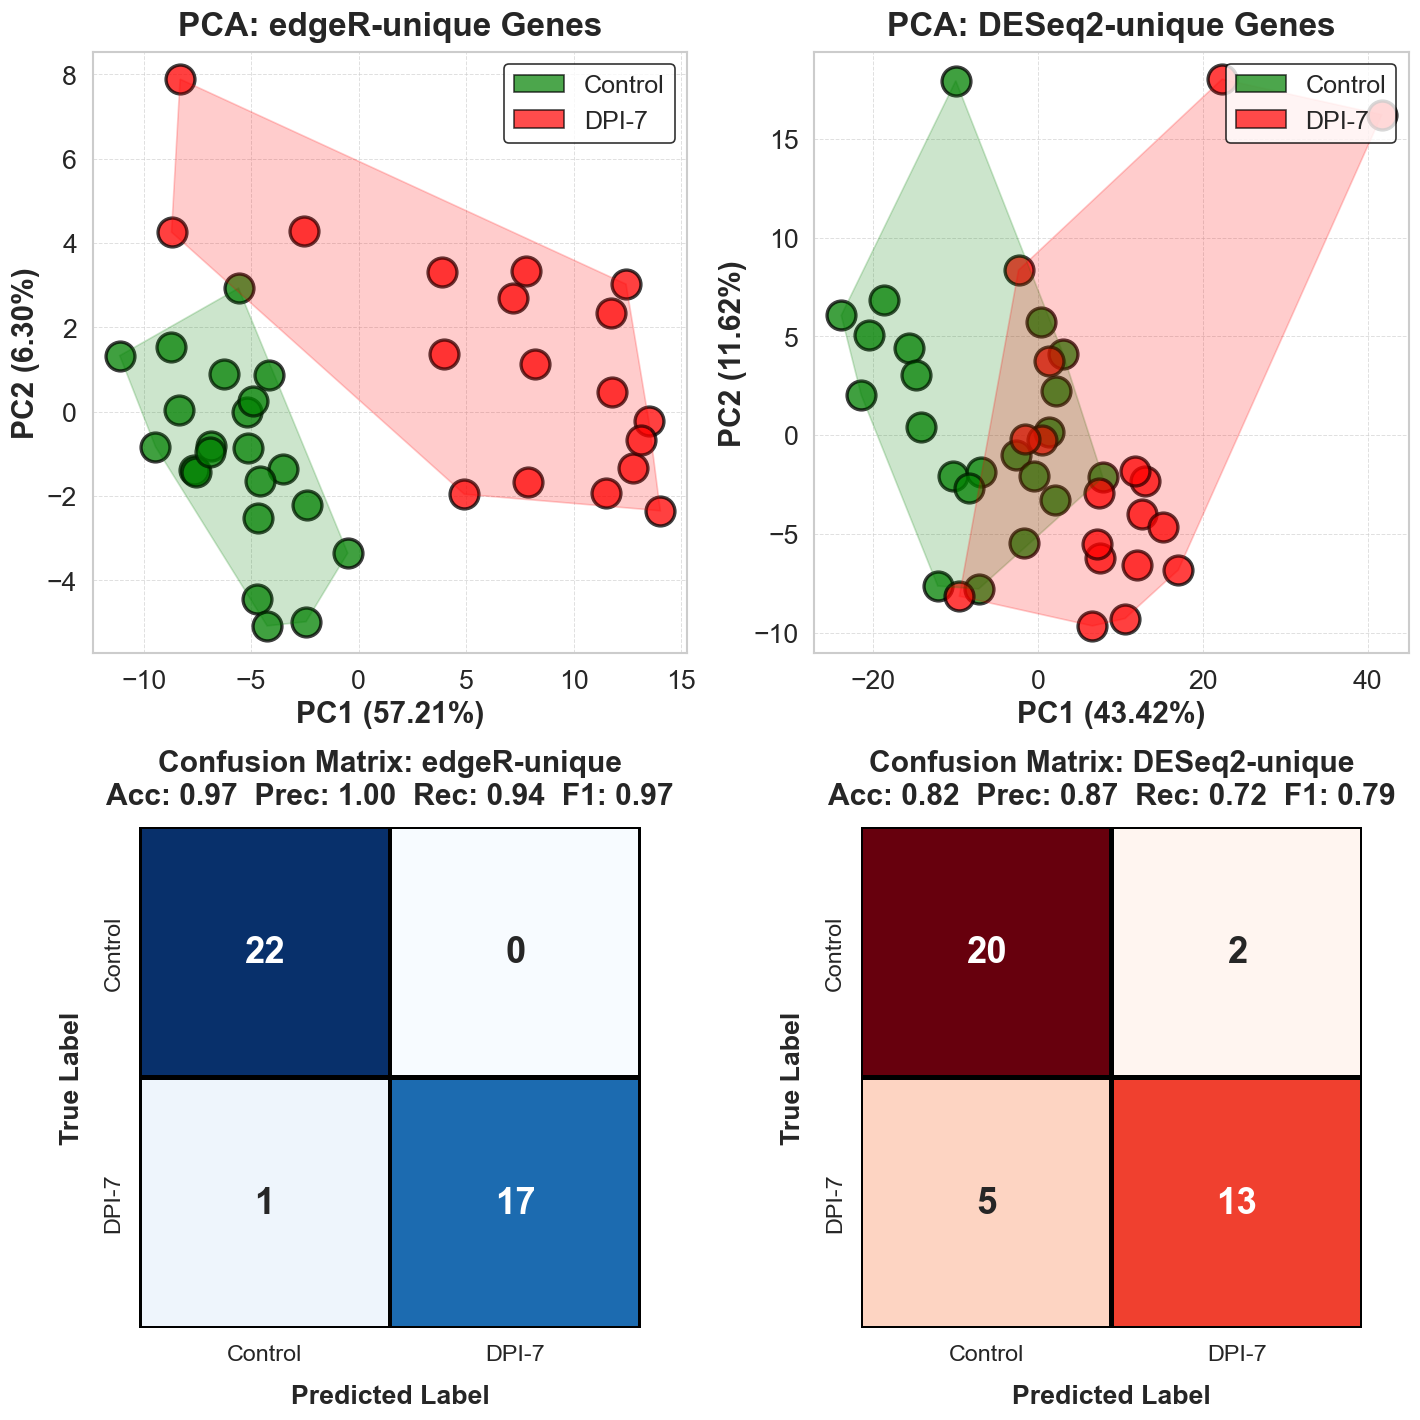

edgeR-unique Metrics
Accuracy:  0.975
Precision: 1.000
Recall:    0.944
F1 Score:  0.971
------------------------------
DESeq2-unique Metrics
Accuracy:  0.825
Precision: 0.867
Recall:    0.722
F1 Score:  0.788


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Patch
from scipy.spatial import ConvexHull
from matplotlib import gridspec
import seaborn as sns






def prepare_data(gene_list, df):
    data = df.copy()
    filtered_genes = [g for g in gene_list if g in data.index]
    data = data.loc[filtered_genes]
    data_transposed = np.log2(data.transpose() + 1)
    group_names = ['Control' if 'Control' in s else 'DPI-7' for s in data_transposed.index]
    labels = [0 if g == 'Control' else 1 for g in group_names]
    return data_transposed, labels, group_names

def plot_pca(ax, data_scaled, group_names, title, color_map):
    pca = PCA(n_components=2)
    components = pca.fit_transform(data_scaled)
    explained = pca.explained_variance_ratio_
    explained_text = [f"{v:.2%}" for v in explained]

    df = pd.DataFrame(components, columns=['PC1', 'PC2'])
    df['Group'] = group_names

    for label in df['Group'].unique():
        points = df[df['Group'] == label][['PC1', 'PC2']].values
        ax.scatter(points[:, 0], points[:, 1],
                   s=300, color=color_map[label], label=label,
                   edgecolor='black', alpha=0.75, linewidth=2)
        if len(points) > 2:
            hull = ConvexHull(points)
            hull_pts = points[hull.vertices]
            ax.fill(hull_pts[:, 0], hull_pts[:, 1], color=color_map[label], alpha=0.2)

    ax.set_title(title, fontsize=20, weight='bold', pad=10)
    ax.set_xlabel(f'PC1 ({explained_text[0]})', fontsize=18, weight='bold')
    ax.set_ylabel(f'PC2 ({explained_text[1]})', fontsize=18, weight='bold')
    ax.tick_params(axis='both', labelsize=16, width=2)
    ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

    handles = [Patch(facecolor=color_map[l], edgecolor='black', label=l, alpha=0.7) for l in df['Group'].unique()]
    ax.legend(handles=handles, fontsize=15, frameon=True, edgecolor='black', loc='upper right')

    return components

def run_classifier(components, labels):
    clf = LogisticRegression()
    clf.fit(components, labels)
    preds = clf.predict(components)
    return confusion_matrix(labels, preds)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_conf_matrix(ax, cm, title, cmap, class_labels, y_true, y_pred):
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=class_labels, yticklabels=class_labels,
                linewidths=2, linecolor="black", square=True, ax=ax,
                annot_kws={"size": 22, "weight": "bold"})
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    metrics_title = f"{title}\nAcc: {acc:.2f}  Prec: {prec:.2f}  Rec: {rec:.2f}  F1: {f1:.2f}"
    
    ax.set_title(metrics_title, fontsize=18, fontweight="bold", pad=14)
    ax.set_xlabel("Predicted Label", fontsize=16, fontweight="bold", labelpad=12)
    ax.set_ylabel("True Label", fontsize=16, fontweight="bold", labelpad=12)
    ax.tick_params(axis='both', labelsize=14, width=2)




color_map = {'Control': 'green', 'DPI-7': 'red'}


data_scaled_er, labels_er, group_names_er = prepare_data(edgeR_only_up + edgeR_only_down, Control_dpi7)
data_scaled_dq, labels_dq, group_names_dq = prepare_data(deseq2_only_up + deseq2_only_down, Control_dpi7)


fig = plt.figure(figsize=(12, 12), dpi=120)
gs = gridspec.GridSpec(2, 2, height_ratios=[1.2, 1])


ax1 = fig.add_subplot(gs[0, 0])
components_er = plot_pca(ax1, data_scaled_er, group_names_er, "PCA: edgeR-unique Genes", color_map)

ax2 = fig.add_subplot(gs[0, 1])
components_dq = plot_pca(ax2, data_scaled_dq, group_names_dq, "PCA: DESeq2-unique Genes", color_map)


clf_er = LogisticRegression().fit(components_er, labels_er)
preds_er = clf_er.predict(components_er)
cm_er = confusion_matrix(labels_er, preds_er)

clf_dq = LogisticRegression().fit(components_dq, labels_dq)
preds_dq = clf_dq.predict(components_dq)
cm_dq = confusion_matrix(labels_dq, preds_dq)


ax3 = fig.add_subplot(gs[1, 0])
plot_conf_matrix(ax3, cm_er, "Confusion Matrix: edgeR-unique", cmap="Blues",
                 class_labels=["Control", "DPI-7"], y_true=labels_er, y_pred=preds_er)




ax4 = fig.add_subplot(gs[1, 1])
plot_conf_matrix(ax4, cm_dq, "Confusion Matrix: DESeq2-unique", cmap="Reds",
                 class_labels=["Control", "DPI-7"], y_true=labels_dq, y_pred=preds_dq)

plt.tight_layout()
plt.show()





acc_er = accuracy_score(labels_er, preds_er)
prec_er = precision_score(labels_er, preds_er)
rec_er = recall_score(labels_er, preds_er)
f1_er = f1_score(labels_er, preds_er)

print("edgeR-unique Metrics")
print(f"Accuracy:  {acc_er:.3f}")
print(f"Precision: {prec_er:.3f}")
print(f"Recall:    {rec_er:.3f}")
print(f"F1 Score:  {f1_er:.3f}")
print("-" * 30)


acc_dq = accuracy_score(labels_dq, preds_dq)
prec_dq = precision_score(labels_dq, preds_dq)
rec_dq = recall_score(labels_dq, preds_dq)
f1_dq = f1_score(labels_dq, preds_dq)

print("DESeq2-unique Metrics")
print(f"Accuracy:  {acc_dq:.3f}")
print(f"Precision: {prec_dq:.3f}")
print(f"Recall:    {rec_dq:.3f}")
print(f"F1 Score:  {f1_dq:.3f}")



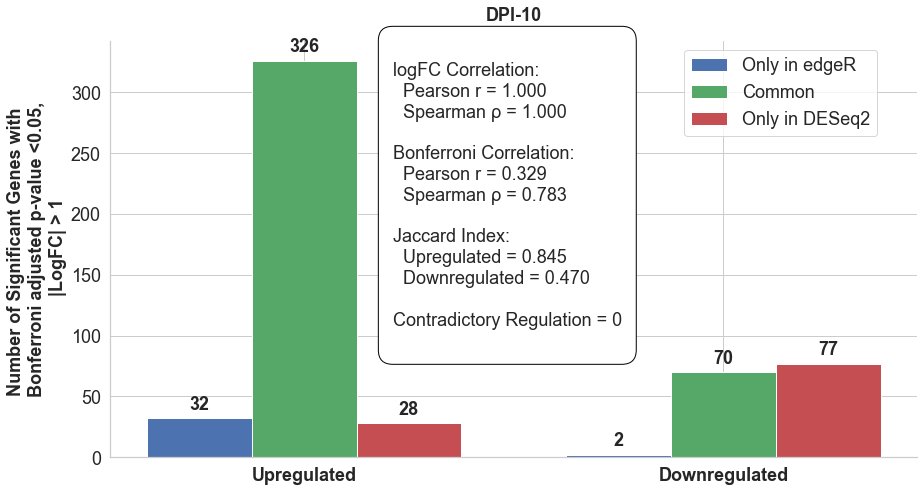

Significant Gene Counts:
  edgeR: 430
  DESeq2: 501
  Common: 396

Upregulated Genes:
  Common: 326
  Only in edgeR: 32
  Only in DESeq2: 28
  Jaccard Index: 0.845

Downregulated Genes:
  Common: 70
  Only in edgeR: 2
  Only in DESeq2: 77
  Jaccard Index: 0.470

Contradictory Regulation (Up in one, Down in other): 0

Correlation of logFC:
  Pearson r = 1.000
  Spearman ρ = 1.000

Correlation of Bonferroni-adjusted p-values:
  Pearson r = 0.329
  Spearman ρ = 0.783
Top 10 common_up: ['ADAMTS14', 'ALPL', 'ANLN', 'APOBEC3A', 'APOBEC3B', 'APOL2', 'APOL6', 'ARF3', 'ARHGAP11A', 'ARHGEF39']
Top 10 common_down: ['APBB2', 'ASF1B', 'ATG2A', 'BACH2', 'BCAR3', 'BDKRB2', 'BTG1', 'CA8', 'CASS4', 'CCKBR']
Top 10 edgeR_only_up: ['ADM2', 'AIFM2', 'ANKRD55', 'CANX', 'CRYBB1', 'CXCL10', 'DDX58', 'DTYMK', 'FADS1', 'FAM177B']
Top 10 deseq2_only_up: ['AGRN', 'B3GNT9', 'CCL1', 'CCR10', 'CHAC2', 'CLDN3', 'FAM72A', 'GLOD5', 'GNLY', 'HID1']
Top 10 edgeR_only_down: ['BMP2', 'MUCL1']
Top 10 deseq2_only_down: ['AD

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


edgeR_sig_df = pd.read_csv("EdgeR_Significant_DPI-10.csv").set_index("Gene Symbol")
deseq2_sig_df = pd.read_csv("DESeq2_Significant_DPI-10.csv").set_index("Gene Symbol")


edgeR_up = set(edgeR_sig_df[edgeR_sig_df["Category"] == "Upregulated"].index)
edgeR_down = set(edgeR_sig_df[edgeR_sig_df["Category"] == "Downregulated"].index)
deseq2_up = set(deseq2_sig_df[deseq2_sig_df["Category"] == "Upregulated"].index)
deseq2_down = set(deseq2_sig_df[deseq2_sig_df["Category"] == "Downregulated"].index)


common_genes = edgeR_sig_df.index.intersection(deseq2_sig_df.index)
df1 = edgeR_sig_df.loc[common_genes]
df2 = deseq2_sig_df.loc[common_genes]


valid_rows = df1["logFC"].notna() & df2["logFC"].notna() & \
             df1["Bonferroni_adjusted_p-value"].notna() & df2["Bonferroni_adjusted_p-value"].notna() & \
             np.isfinite(df1["logFC"]) & np.isfinite(df2["logFC"]) & \
             np.isfinite(df1["Bonferroni_adjusted_p-value"]) & np.isfinite(df2["Bonferroni_adjusted_p-value"])

df1_clean = df1[valid_rows]
df2_clean = df2[valid_rows]


logfc1 = df1_clean["logFC"]
logfc2 = df2_clean["logFC"]
bonf1 = df1_clean["Bonferroni_adjusted_p-value"]
bonf2 = df2_clean["Bonferroni_adjusted_p-value"]

pearson_logfc, _ = pearsonr(logfc1, logfc2)
spearman_logfc, _ = spearmanr(logfc1, logfc2)
pearson_bonf, _ = pearsonr(bonf1, bonf2)
spearman_bonf, _ = spearmanr(bonf1, bonf2)


jaccard_up = len(edgeR_up & deseq2_up) / len(edgeR_up | deseq2_up)
jaccard_down = len(edgeR_down & deseq2_down) / len(edgeR_down | deseq2_down)


contradictory = len((edgeR_up & deseq2_down) | (edgeR_down & deseq2_up))


common_up = edgeR_up & deseq2_up
common_down = edgeR_down & deseq2_down
edgeR_only_up = edgeR_up - deseq2_up
deseq2_only_up = deseq2_up - edgeR_up
edgeR_only_down = edgeR_down - deseq2_down
deseq2_only_down = deseq2_down - edgeR_down

labels = ["Upregulated", "Downregulated"]
x = np.arange(len(labels))
width = 0.25

edgeR_only_counts = [len(edgeR_only_up), len(edgeR_only_down)]
common_counts = [len(common_up), len(common_down)]
deseq2_only_counts = [len(deseq2_only_up), len(deseq2_only_down)]

# Plotting
sns.set(style="whitegrid")
plt.rcParams.update({"font.size": 12}) 

colors = {
    "Only in edgeR": "#4C72B0",
    "Common": "#55A868",
    "Only in DESeq2": "#C44E52"
}

fig, ax = plt.subplots(figsize=(13, 7))
bar1 = ax.bar(x - width, edgeR_only_counts, width, label='Only in edgeR', color=colors["Only in edgeR"])
bar2 = ax.bar(x, common_counts, width, label='Common', color=colors["Common"])
bar3 = ax.bar(x + width, deseq2_only_counts, width, label='Only in DESeq2', color=colors["Only in DESeq2"])

ax.set_ylabel("Number of Significant Genes with \n Bonferroni adjusted p-value <0.05, \n |LogFC| > 1", fontsize=18, weight='bold')
ax.set_title("DPI-10", fontsize=18, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18, weight='bold')
ax.tick_params(axis='y', labelsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=True, fontsize=18, loc='upper left', bbox_to_anchor=(.7, 1))

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=18, weight='bold')

textstr = f"""
logFC Correlation:
  Pearson r = {pearson_logfc:.3f}
  Spearman ρ = {spearman_logfc:.3f}

Bonferroni Correlation:
  Pearson r = {pearson_bonf:.3f}
  Spearman ρ = {spearman_bonf:.3f}

Jaccard Index:
  Upregulated = {jaccard_up:.3f}
  Downregulated = {jaccard_down:.3f}

Contradictory Regulation = {contradictory}
"""
props = dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='black')
ax.text(.35, 1, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()






common_up = edgeR_up & deseq2_up
common_down = edgeR_down & deseq2_down
edgeR_only_up = edgeR_up - deseq2_up
deseq2_only_up = deseq2_up - edgeR_up
edgeR_only_down = edgeR_down - deseq2_down
deseq2_only_down = deseq2_down - edgeR_down


print("Significant Gene Counts:")
print(f"  edgeR: {edgeR_sig_df.shape[0]}")
print(f"  DESeq2: {deseq2_sig_df.shape[0]}")
print(f"  Common: {len(common_genes)}")

print("\nUpregulated Genes:")
print(f"  Common: {len(common_up)}")
print(f"  Only in edgeR: {len(edgeR_only_up)}")
print(f"  Only in DESeq2: {len(deseq2_only_up)}")
print(f"  Jaccard Index: {jaccard_up:.3f}")

print("\nDownregulated Genes:")
print(f"  Common: {len(common_down)}")
print(f"  Only in edgeR: {len(edgeR_only_down)}")
print(f"  Only in DESeq2: {len(deseq2_only_down)}")
print(f"  Jaccard Index: {jaccard_down:.3f}")

print(f"\nContradictory Regulation (Up in one, Down in other): {contradictory}")

print("\nCorrelation of logFC:")
print(f"  Pearson r = {pearson_logfc:.3f}")
print(f"  Spearman ρ = {spearman_logfc:.3f}")

print("\nCorrelation of Bonferroni-adjusted p-values:")
print(f"  Pearson r = {pearson_bonf:.3f}")
print(f"  Spearman ρ = {spearman_bonf:.3f}")


common_up = sorted(list(edgeR_up & deseq2_up))
common_down = sorted(list(edgeR_down & deseq2_down))
edgeR_only_up = sorted(list(edgeR_up - deseq2_up))
deseq2_only_up = sorted(list(deseq2_up - edgeR_up))
edgeR_only_down = sorted(list(edgeR_down - deseq2_down))
deseq2_only_down = sorted(list(deseq2_down - edgeR_down))

print("Top 10 common_up:", common_up[:10])
print("Top 10 common_down:", common_down[:10])
print("Top 10 edgeR_only_up:", edgeR_only_up[:10])
print("Top 10 deseq2_only_up:", deseq2_only_up[:10])
print("Top 10 edgeR_only_down:", edgeR_only_down[:10])
print("Top 10 deseq2_only_down:", deseq2_only_down[:10])


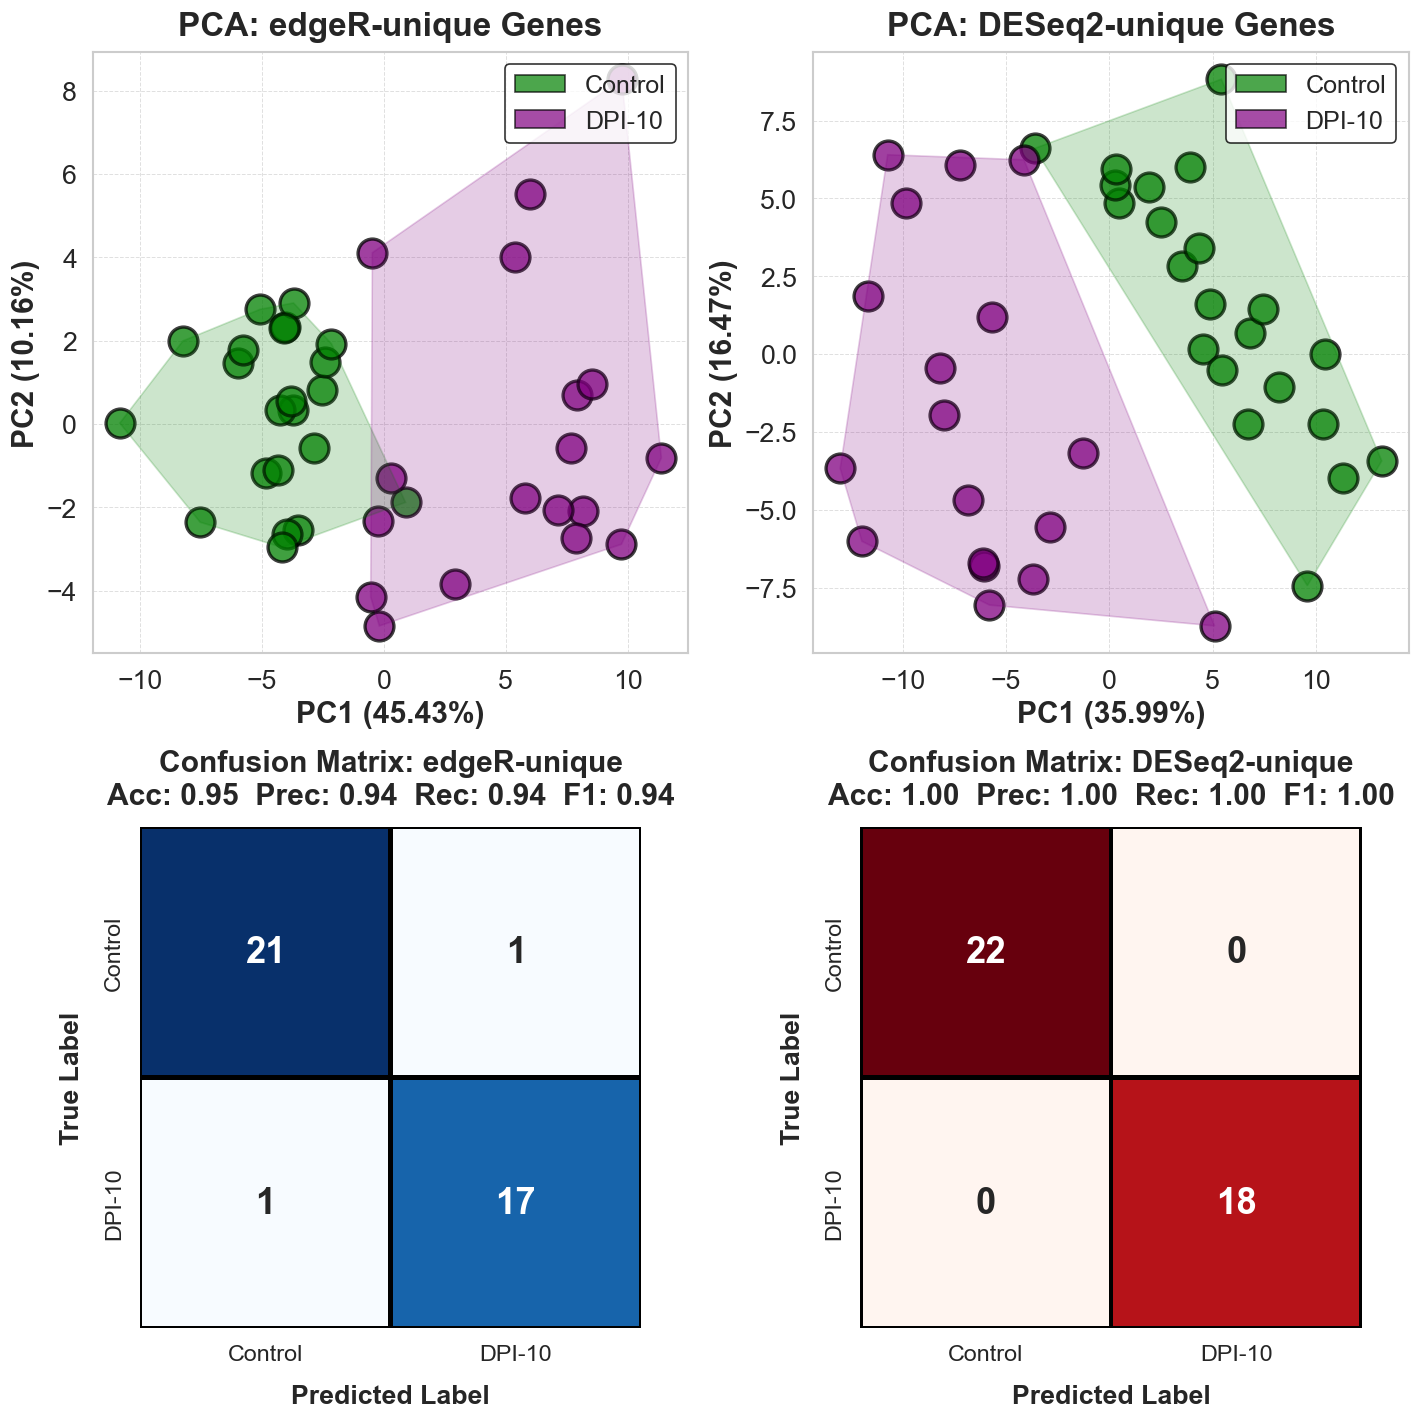

edgeR-unique Metrics
Accuracy:  0.950
Precision: 0.944
Recall:    0.944
F1 Score:  0.944
------------------------------
DESeq2-unique Metrics
Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1 Score:  1.000


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Patch
from scipy.spatial import ConvexHull
from matplotlib import gridspec
import seaborn as sns






def prepare_data(gene_list, df):
    data = df.copy()
    filtered_genes = [g for g in gene_list if g in data.index]
    data = data.loc[filtered_genes]
    data_transposed = np.log2(data.transpose() + 1)
    group_names = ['Control' if 'Control' in s else 'DPI-10' for s in data_transposed.index]
    labels = [0 if g == 'Control' else 1 for g in group_names]
    return data_transposed, labels, group_names

def plot_pca(ax, data_scaled, group_names, title, color_map):
    pca = PCA(n_components=2)
    components = pca.fit_transform(data_scaled)
    explained = pca.explained_variance_ratio_
    explained_text = [f"{v:.2%}" for v in explained]

    df = pd.DataFrame(components, columns=['PC1', 'PC2'])
    df['Group'] = group_names

    for label in df['Group'].unique():
        points = df[df['Group'] == label][['PC1', 'PC2']].values
        ax.scatter(points[:, 0], points[:, 1],
                   s=300, color=color_map[label], label=label,
                   edgecolor='black', alpha=0.75, linewidth=2)
        if len(points) > 2:
            hull = ConvexHull(points)
            hull_pts = points[hull.vertices]
            ax.fill(hull_pts[:, 0], hull_pts[:, 1], color=color_map[label], alpha=0.2)

    ax.set_title(title, fontsize=20, weight='bold', pad=10)
    ax.set_xlabel(f'PC1 ({explained_text[0]})', fontsize=18, weight='bold')
    ax.set_ylabel(f'PC2 ({explained_text[1]})', fontsize=18, weight='bold')
    ax.tick_params(axis='both', labelsize=16, width=2)
    ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

    handles = [Patch(facecolor=color_map[l], edgecolor='black', label=l, alpha=0.7) for l in df['Group'].unique()]
    ax.legend(handles=handles, fontsize=15, frameon=True, edgecolor='black', loc='upper right')

    return components

def run_classifier(components, labels):
    clf = LogisticRegression()
    clf.fit(components, labels)
    preds = clf.predict(components)
    return confusion_matrix(labels, preds)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_conf_matrix(ax, cm, title, cmap, class_labels, y_true, y_pred):
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=class_labels, yticklabels=class_labels,
                linewidths=2, linecolor="black", square=True, ax=ax,
                annot_kws={"size": 22, "weight": "bold"})
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    metrics_title = f"{title}\nAcc: {acc:.2f}  Prec: {prec:.2f}  Rec: {rec:.2f}  F1: {f1:.2f}"
    
    ax.set_title(metrics_title, fontsize=18, fontweight="bold", pad=14)
    ax.set_xlabel("Predicted Label", fontsize=16, fontweight="bold", labelpad=12)
    ax.set_ylabel("True Label", fontsize=16, fontweight="bold", labelpad=12)
    ax.tick_params(axis='both', labelsize=14, width=2)




color_map = {'Control': 'green', 'DPI-10': 'purple'}


data_scaled_er, labels_er, group_names_er = prepare_data(edgeR_only_up + edgeR_only_down, Control_dpi10)
data_scaled_dq, labels_dq, group_names_dq = prepare_data(deseq2_only_up + deseq2_only_down, Control_dpi10)


fig = plt.figure(figsize=(12, 12), dpi=120)
gs = gridspec.GridSpec(2, 2, height_ratios=[1.2, 1])


ax1 = fig.add_subplot(gs[0, 0])
components_er = plot_pca(ax1, data_scaled_er, group_names_er, "PCA: edgeR-unique Genes", color_map)

ax2 = fig.add_subplot(gs[0, 1])
components_dq = plot_pca(ax2, data_scaled_dq, group_names_dq, "PCA: DESeq2-unique Genes", color_map)


clf_er = LogisticRegression().fit(components_er, labels_er)
preds_er = clf_er.predict(components_er)
cm_er = confusion_matrix(labels_er, preds_er)

clf_dq = LogisticRegression().fit(components_dq, labels_dq)
preds_dq = clf_dq.predict(components_dq)
cm_dq = confusion_matrix(labels_dq, preds_dq)


ax3 = fig.add_subplot(gs[1, 0])
plot_conf_matrix(ax3, cm_er, "Confusion Matrix: edgeR-unique", cmap="Blues",
                 class_labels=["Control", "DPI-10"], y_true=labels_er, y_pred=preds_er)




ax4 = fig.add_subplot(gs[1, 1])
plot_conf_matrix(ax4, cm_dq, "Confusion Matrix: DESeq2-unique", cmap="Reds",
                 class_labels=["Control", "DPI-10"], y_true=labels_dq, y_pred=preds_dq)

plt.tight_layout()
plt.show()





acc_er = accuracy_score(labels_er, preds_er)
prec_er = precision_score(labels_er, preds_er)
rec_er = recall_score(labels_er, preds_er)
f1_er = f1_score(labels_er, preds_er)

print("edgeR-unique Metrics")
print(f"Accuracy:  {acc_er:.3f}")
print(f"Precision: {prec_er:.3f}")
print(f"Recall:    {rec_er:.3f}")
print(f"F1 Score:  {f1_er:.3f}")
print("-" * 30)


acc_dq = accuracy_score(labels_dq, preds_dq)
prec_dq = precision_score(labels_dq, preds_dq)
rec_dq = recall_score(labels_dq, preds_dq)
f1_dq = f1_score(labels_dq, preds_dq)

print("DESeq2-unique Metrics")
print(f"Accuracy:  {acc_dq:.3f}")
print(f"Precision: {prec_dq:.3f}")
print(f"Recall:    {rec_dq:.3f}")
print(f"F1 Score:  {f1_dq:.3f}")



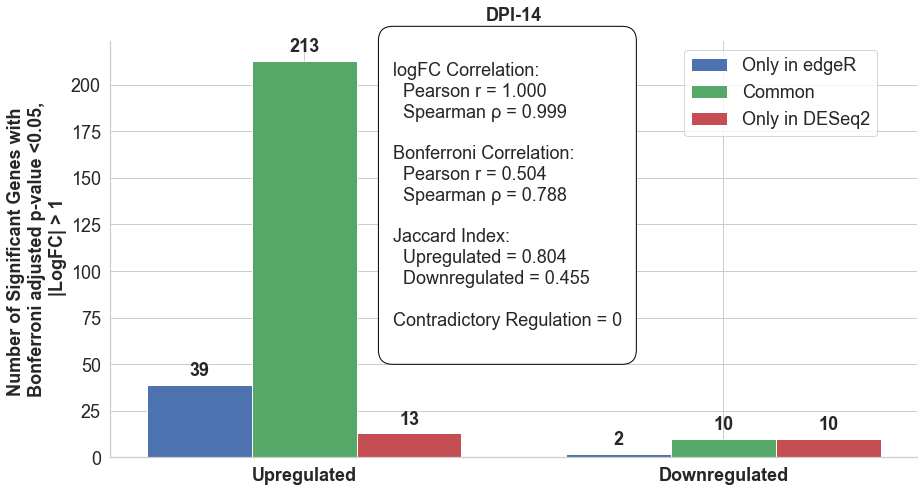

Significant Gene Counts:
  edgeR: 264
  DESeq2: 246
  Common: 223

Upregulated Genes:
  Common: 213
  Only in edgeR: 39
  Only in DESeq2: 13
  Jaccard Index: 0.804

Downregulated Genes:
  Common: 10
  Only in edgeR: 2
  Only in DESeq2: 10
  Jaccard Index: 0.455

Contradictory Regulation (Up in one, Down in other): 0

Correlation of logFC:
  Pearson r = 1.000
  Spearman ρ = 0.999

Correlation of Bonferroni-adjusted p-values:
  Pearson r = 0.504
  Spearman ρ = 0.788
Top 10 common_up: ['AICDA', 'ANLN', 'APOL6', 'ARHGAP11A', 'ASPM', 'ASRGL1', 'AUNIP', 'AURKA', 'B3GNT9', 'B9D1']
Top 10 common_down: ['CAMKK1', 'CD1B', 'CLEC9A', 'FAM20C', 'FN1', 'JAKMIP2', 'NSG1', 'RTN1', 'TIFAB', 'ZNF219']
Top 10 edgeR_only_up: ['ACKR3', 'ARNTL2', 'CDC42EP1', 'CLEC17A', 'CLIC4', 'CRELD2', 'DERL3', 'DNAI1', 'ESCO2', 'GCH1']
Top 10 deseq2_only_up: ['ADAMTS14', 'CCNE2', 'CENPH', 'DEFA1B', 'DST', 'E2F7', 'EXO1', 'IL3RA', 'NETO2', 'SLC27A2']
Top 10 edgeR_only_down: ['PGM5', 'RIN2']
Top 10 deseq2_only_down: ['COL1

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


edgeR_sig_df = pd.read_csv("EdgeR_Significant_DPI-14.csv").set_index("Gene Symbol")
deseq2_sig_df = pd.read_csv("DESeq2_Significant_DPI-14.csv").set_index("Gene Symbol")


edgeR_up = set(edgeR_sig_df[edgeR_sig_df["Category"] == "Upregulated"].index)
edgeR_down = set(edgeR_sig_df[edgeR_sig_df["Category"] == "Downregulated"].index)
deseq2_up = set(deseq2_sig_df[deseq2_sig_df["Category"] == "Upregulated"].index)
deseq2_down = set(deseq2_sig_df[deseq2_sig_df["Category"] == "Downregulated"].index)


common_genes = edgeR_sig_df.index.intersection(deseq2_sig_df.index)
df1 = edgeR_sig_df.loc[common_genes]
df2 = deseq2_sig_df.loc[common_genes]


valid_rows = df1["logFC"].notna() & df2["logFC"].notna() & \
             df1["Bonferroni_adjusted_p-value"].notna() & df2["Bonferroni_adjusted_p-value"].notna() & \
             np.isfinite(df1["logFC"]) & np.isfinite(df2["logFC"]) & \
             np.isfinite(df1["Bonferroni_adjusted_p-value"]) & np.isfinite(df2["Bonferroni_adjusted_p-value"])

df1_clean = df1[valid_rows]
df2_clean = df2[valid_rows]


logfc1 = df1_clean["logFC"]
logfc2 = df2_clean["logFC"]
bonf1 = df1_clean["Bonferroni_adjusted_p-value"]
bonf2 = df2_clean["Bonferroni_adjusted_p-value"]

pearson_logfc, _ = pearsonr(logfc1, logfc2)
spearman_logfc, _ = spearmanr(logfc1, logfc2)
pearson_bonf, _ = pearsonr(bonf1, bonf2)
spearman_bonf, _ = spearmanr(bonf1, bonf2)


jaccard_up = len(edgeR_up & deseq2_up) / len(edgeR_up | deseq2_up)
jaccard_down = len(edgeR_down & deseq2_down) / len(edgeR_down | deseq2_down)


contradictory = len((edgeR_up & deseq2_down) | (edgeR_down & deseq2_up))


common_up = edgeR_up & deseq2_up
common_down = edgeR_down & deseq2_down
edgeR_only_up = edgeR_up - deseq2_up
deseq2_only_up = deseq2_up - edgeR_up
edgeR_only_down = edgeR_down - deseq2_down
deseq2_only_down = deseq2_down - edgeR_down

labels = ["Upregulated", "Downregulated"]
x = np.arange(len(labels))
width = 0.25

edgeR_only_counts = [len(edgeR_only_up), len(edgeR_only_down)]
common_counts = [len(common_up), len(common_down)]
deseq2_only_counts = [len(deseq2_only_up), len(deseq2_only_down)]


sns.set(style="whitegrid")
plt.rcParams.update({"font.size": 12}) 

colors = {
    "Only in edgeR": "#4C72B0",
    "Common": "#55A868",
    "Only in DESeq2": "#C44E52"
}

fig, ax = plt.subplots(figsize=(13, 7))
bar1 = ax.bar(x - width, edgeR_only_counts, width, label='Only in edgeR', color=colors["Only in edgeR"])
bar2 = ax.bar(x, common_counts, width, label='Common', color=colors["Common"])
bar3 = ax.bar(x + width, deseq2_only_counts, width, label='Only in DESeq2', color=colors["Only in DESeq2"])

ax.set_ylabel("Number of Significant Genes with \n Bonferroni adjusted p-value <0.05, \n |LogFC| > 1", fontsize=18, weight='bold')
ax.set_title("DPI-14", fontsize=18, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18, weight='bold')
ax.tick_params(axis='y', labelsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=True, fontsize=18, loc='upper left', bbox_to_anchor=(.7, 1))

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=18, weight='bold')

textstr = f"""
logFC Correlation:
  Pearson r = {pearson_logfc:.3f}
  Spearman ρ = {spearman_logfc:.3f}

Bonferroni Correlation:
  Pearson r = {pearson_bonf:.3f}
  Spearman ρ = {spearman_bonf:.3f}

Jaccard Index:
  Upregulated = {jaccard_up:.3f}
  Downregulated = {jaccard_down:.3f}

Contradictory Regulation = {contradictory}
"""
props = dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='black')
ax.text(.35, 1, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()






common_up = edgeR_up & deseq2_up
common_down = edgeR_down & deseq2_down
edgeR_only_up = edgeR_up - deseq2_up
deseq2_only_up = deseq2_up - edgeR_up
edgeR_only_down = edgeR_down - deseq2_down
deseq2_only_down = deseq2_down - edgeR_down


print("Significant Gene Counts:")
print(f"  edgeR: {edgeR_sig_df.shape[0]}")
print(f"  DESeq2: {deseq2_sig_df.shape[0]}")
print(f"  Common: {len(common_genes)}")

print("\nUpregulated Genes:")
print(f"  Common: {len(common_up)}")
print(f"  Only in edgeR: {len(edgeR_only_up)}")
print(f"  Only in DESeq2: {len(deseq2_only_up)}")
print(f"  Jaccard Index: {jaccard_up:.3f}")

print("\nDownregulated Genes:")
print(f"  Common: {len(common_down)}")
print(f"  Only in edgeR: {len(edgeR_only_down)}")
print(f"  Only in DESeq2: {len(deseq2_only_down)}")
print(f"  Jaccard Index: {jaccard_down:.3f}")

print(f"\nContradictory Regulation (Up in one, Down in other): {contradictory}")

print("\nCorrelation of logFC:")
print(f"  Pearson r = {pearson_logfc:.3f}")
print(f"  Spearman ρ = {spearman_logfc:.3f}")

print("\nCorrelation of Bonferroni-adjusted p-values:")
print(f"  Pearson r = {pearson_bonf:.3f}")
print(f"  Spearman ρ = {spearman_bonf:.3f}")



common_up = sorted(list(edgeR_up & deseq2_up))
common_down = sorted(list(edgeR_down & deseq2_down))
edgeR_only_up = sorted(list(edgeR_up - deseq2_up))
deseq2_only_up = sorted(list(deseq2_up - edgeR_up))
edgeR_only_down = sorted(list(edgeR_down - deseq2_down))
deseq2_only_down = sorted(list(deseq2_down - edgeR_down))

print("Top 10 common_up:", common_up[:10])
print("Top 10 common_down:", common_down[:10])
print("Top 10 edgeR_only_up:", edgeR_only_up[:10])
print("Top 10 deseq2_only_up:", deseq2_only_up[:10])
print("Top 10 edgeR_only_down:", edgeR_only_down[:10])
print("Top 10 deseq2_only_down:", deseq2_only_down[:10])


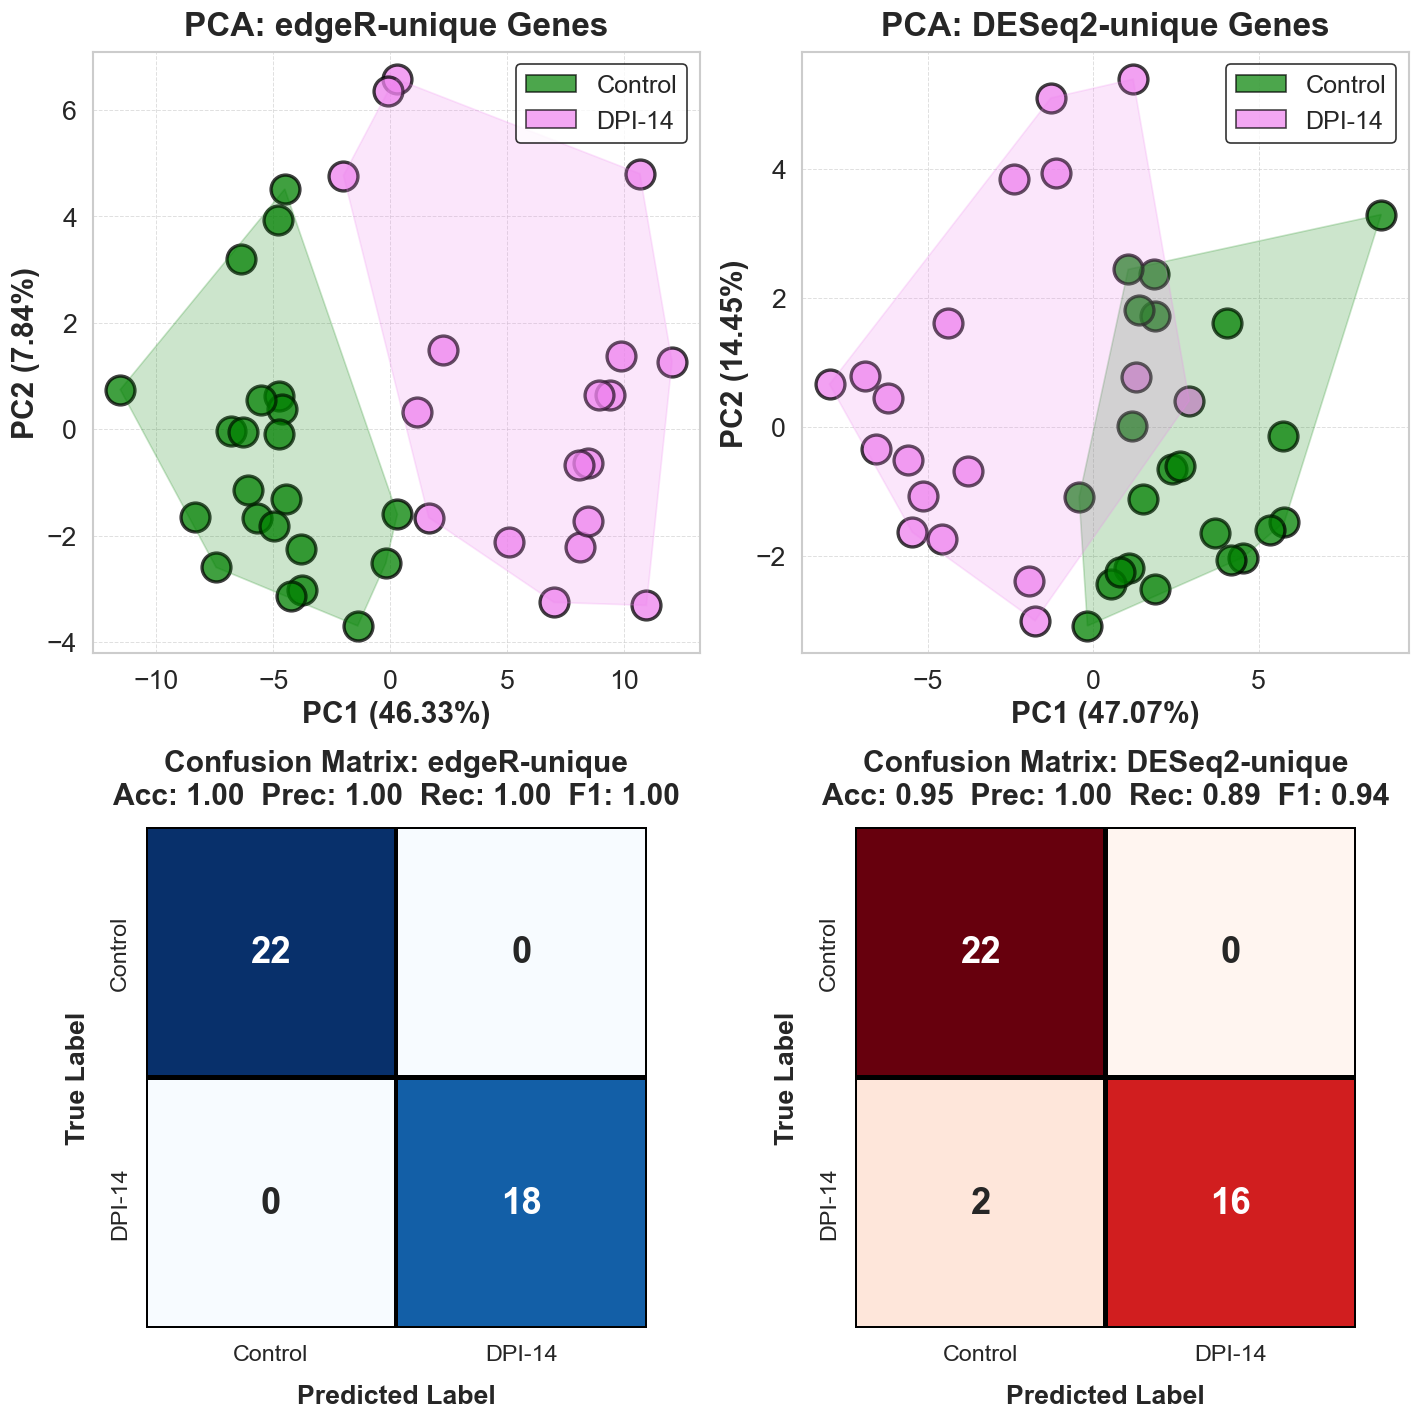

edgeR-unique Metrics
Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1 Score:  1.000
------------------------------
DESeq2-unique Metrics
Accuracy:  0.950
Precision: 1.000
Recall:    0.889
F1 Score:  0.941


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Patch
from scipy.spatial import ConvexHull
from matplotlib import gridspec
import seaborn as sns





def prepare_data(gene_list, df):
    data = df.copy()
    filtered_genes = [g for g in gene_list if g in data.index]
    data = data.loc[filtered_genes]
    data_transposed = np.log2(data.transpose() + 1)
    group_names = ['Control' if 'Control' in s else 'DPI-14' for s in data_transposed.index]
    labels = [0 if g == 'Control' else 1 for g in group_names]
    return data_transposed, labels, group_names

def plot_pca(ax, data_scaled, group_names, title, color_map):
    pca = PCA(n_components=2)
    components = pca.fit_transform(data_scaled)
    explained = pca.explained_variance_ratio_
    explained_text = [f"{v:.2%}" for v in explained]

    df = pd.DataFrame(components, columns=['PC1', 'PC2'])
    df['Group'] = group_names

    for label in df['Group'].unique():
        points = df[df['Group'] == label][['PC1', 'PC2']].values
        ax.scatter(points[:, 0], points[:, 1],
                   s=300, color=color_map[label], label=label,
                   edgecolor='black', alpha=0.75, linewidth=2)
        if len(points) > 2:
            hull = ConvexHull(points)
            hull_pts = points[hull.vertices]
            ax.fill(hull_pts[:, 0], hull_pts[:, 1], color=color_map[label], alpha=0.2)

    ax.set_title(title, fontsize=20, weight='bold', pad=10)
    ax.set_xlabel(f'PC1 ({explained_text[0]})', fontsize=18, weight='bold')
    ax.set_ylabel(f'PC2 ({explained_text[1]})', fontsize=18, weight='bold')
    ax.tick_params(axis='both', labelsize=16, width=2)
    ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

    handles = [Patch(facecolor=color_map[l], edgecolor='black', label=l, alpha=0.7) for l in df['Group'].unique()]
    ax.legend(handles=handles, fontsize=15, frameon=True, edgecolor='black', loc='upper right')

    return components

def run_classifier(components, labels):
    clf = LogisticRegression()
    clf.fit(components, labels)
    preds = clf.predict(components)
    return confusion_matrix(labels, preds)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_conf_matrix(ax, cm, title, cmap, class_labels, y_true, y_pred):
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=class_labels, yticklabels=class_labels,
                linewidths=2, linecolor="black", square=True, ax=ax,
                annot_kws={"size": 22, "weight": "bold"})
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

 
    metrics_title = f"{title}\nAcc: {acc:.2f}  Prec: {prec:.2f}  Rec: {rec:.2f}  F1: {f1:.2f}"
    
    ax.set_title(metrics_title, fontsize=18, fontweight="bold", pad=14)
    ax.set_xlabel("Predicted Label", fontsize=16, fontweight="bold", labelpad=12)
    ax.set_ylabel("True Label", fontsize=16, fontweight="bold", labelpad=12)
    ax.tick_params(axis='both', labelsize=14, width=2)



color_map = {'Control': 'green', 'DPI-14': 'violet'}


data_scaled_er, labels_er, group_names_er = prepare_data(edgeR_only_up + edgeR_only_down, Control_dpi14)
data_scaled_dq, labels_dq, group_names_dq = prepare_data(deseq2_only_up + deseq2_only_down, Control_dpi14)


fig = plt.figure(figsize=(12, 12), dpi=120)
gs = gridspec.GridSpec(2, 2, height_ratios=[1.2, 1])


ax1 = fig.add_subplot(gs[0, 0])
components_er = plot_pca(ax1, data_scaled_er, group_names_er, "PCA: edgeR-unique Genes", color_map)

ax2 = fig.add_subplot(gs[0, 1])
components_dq = plot_pca(ax2, data_scaled_dq, group_names_dq, "PCA: DESeq2-unique Genes", color_map)


clf_er = LogisticRegression().fit(components_er, labels_er)
preds_er = clf_er.predict(components_er)
cm_er = confusion_matrix(labels_er, preds_er)

clf_dq = LogisticRegression().fit(components_dq, labels_dq)
preds_dq = clf_dq.predict(components_dq)
cm_dq = confusion_matrix(labels_dq, preds_dq)


ax3 = fig.add_subplot(gs[1, 0])
plot_conf_matrix(ax3, cm_er, "Confusion Matrix: edgeR-unique", cmap="Blues",
                 class_labels=["Control", "DPI-14"], y_true=labels_er, y_pred=preds_er)




ax4 = fig.add_subplot(gs[1, 1])
plot_conf_matrix(ax4, cm_dq, "Confusion Matrix: DESeq2-unique", cmap="Reds",
                 class_labels=["Control", "DPI-14"], y_true=labels_dq, y_pred=preds_dq)

plt.tight_layout()
plt.show()





acc_er = accuracy_score(labels_er, preds_er)
prec_er = precision_score(labels_er, preds_er)
rec_er = recall_score(labels_er, preds_er)
f1_er = f1_score(labels_er, preds_er)

print("edgeR-unique Metrics")
print(f"Accuracy:  {acc_er:.3f}")
print(f"Precision: {prec_er:.3f}")
print(f"Recall:    {rec_er:.3f}")
print(f"F1 Score:  {f1_er:.3f}")
print("-" * 30)


acc_dq = accuracy_score(labels_dq, preds_dq)
prec_dq = precision_score(labels_dq, preds_dq)
rec_dq = recall_score(labels_dq, preds_dq)
f1_dq = f1_score(labels_dq, preds_dq)

print("DESeq2-unique Metrics")
print(f"Accuracy:  {acc_dq:.3f}")
print(f"Precision: {prec_dq:.3f}")
print(f"Recall:    {rec_dq:.3f}")
print(f"F1 Score:  {f1_dq:.3f}")

